## A Portfolio of Technology Stocks in the S&P 500 using Markowitz's Modern Portfolio Theory

The objective of the project is look for the optimal portfolio which give best risk-return trade-off that lie along the minimum variance frontier within a set of given risky assets.

The assets in this case are the Technology Stocks of the S&P 500

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize
from random import randint
import warnings
warnings.filterwarnings('ignore')

<br>

**The Historical stock datasets was downloaded in the form of cvs files from Yahoo Finanace and in the cell below, the data was read inton a Pandas dataframe**

**A much faster approach is an API call, one of which is the use of a library such as yfinance to get the stock data from Yahoo finance**

In [2]:
# Get a list of all CSV files in a directory
csv_files = glob.glob('data/*.csv')

# Create an empty dataframe to store the combined data

combined_df = pd.DataFrame()

for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    file_name = str(csv_file.split('.')[0].split('\\')[-1])
    updated_df = df[['Date', 'Close']]
    updated_df[file_name] = updated_df['Close']
    updated_df.drop(['Close'], axis=1, inplace=True)
    updated_df['Date'] = pd.to_datetime(arg=updated_df['Date'])
    updated_df.set_index('Date', inplace=True)
    
    
    combined_df = pd.concat([combined_df, updated_df], axis=1)

    
# While downloading the dataset, the ending dates considered for the stock was 30th of August but some
# stocks had their end dates beyond that.The line of code was used to make the stock end dates uniform
combined_df.drop([combined_df.index[-1], combined_df.index[-2]], inplace=True)


# Reversing the order of the sorting

<br>
<br>

## Viewing the dataset

In [3]:
combined_df.head()

AAPL        ACN       ADBE        ADI       ADSK       AKAM  \
Date                                                                           
2012-01-03  14.686786  52.950001  28.570000  36.029999  30.809999  32.930000   
2012-01-04  14.765714  52.930000  28.280001  35.980000  30.209999  32.439999   
2012-01-05  14.929643  51.919998  28.480000  36.139999  30.820000  32.430000   
2012-01-06  15.085714  51.830002  28.719999  35.900002  30.959999  32.759998   
2012-01-09  15.061786  51.740002  28.530001  36.599998  31.080000  32.610001   

             AMAT   AMD  ANET       ANSS  ...       SWKS        TDY  \
Date                                      ...                         
2012-01-03  10.70  5.48   NaN  57.389999  ...  16.820000  55.820000   
2012-01-04  10.76  5.46   NaN  56.400002  ...  16.780001  55.790001   
2012-01-05  10.83  5.46   NaN  57.299999  ...  17.280001  55.570000   
2012-01-06  11.01  5.43   NaN  56.939999  ...  17.150000  55.580002   
2012-01-09  11.34  5.59   NaN  56.680000  ...  17.809999  55.220001   

                  TEL    TER       TRMB        TXN        TYL       VRSN  \
Date                                                                       
2012-01-03  31.480000  13.75  20.815001  29.760000  30.340000  35.820000   
2012-01-04  31.570000  14.18  20.105000  29.570000  30.360001  35.820000   
2012-01-05  31.920000  14.62  20.385000  29.780001  31.090000  35.740002   
2012-01-06  32.360001  14.63  20.075001  29.780001  31.809999  35.400002   
2012-01-09  32.810001  14.89  20.870001  30.160000  31.559999  35.020000   

                  WDC       ZBRA  
Date                              
2012-01-03  30.980000  35.720001  
2012-01-04  31.299999  35.450001  
2012-01-05  32.759998  35.400002  
2012-01-06  33.490002  35.110001  
2012-01-09  33.750000  34.950001  

[5 rows x 62 columns]

<br>
<br>
<br>

The historical stock data considered spanned ten years, using daily data - from `01-01-2012` to `30-08-2023`

The start date for stock was `03-01-2012` as the first two days of 2012 were public holidays.

According to Google, there are approximately `252 days in a year`, `21 days per month` and `12 months per year` for trading in a Stock market.

Some Technology companies on the S&P 500 do not have their stock options extend back to 2012, and they were therfore dropped from the dataset used leaving us with 52 portfolios

In [4]:
# Dropping portfolios that are not up to 10 years

combined_df.dropna(axis=1, how='any', inplace=True)

In [5]:
combined_df.sort_values(['Date'], ascending=False)

AAPL         ACN        ADBE         ADI        ADSK  \
Date                                                                     
2023-08-30  187.649994  323.250000  545.359985  181.570007  221.550003   
2023-08-29  184.119995  323.450012  540.570007  182.559998  219.399994   
2023-08-28  180.190002  320.910004  529.919983  180.330002  217.089996   
2023-08-25  178.610001  318.760010  525.059998  178.160004  215.919998   
2023-08-24  176.380005  314.140015  512.429993  173.690002  208.600006   
...                ...         ...         ...         ...         ...   
2012-01-09   15.061786   51.740002   28.530001   36.599998   31.080000   
2012-01-06   15.085714   51.830002   28.719999   35.900002   30.959999   
2012-01-05   14.929643   51.919998   28.480000   36.139999   30.820000   
2012-01-04   14.765714   52.930000   28.280001   35.980000   30.209999   
2012-01-03   14.686786   52.950001   28.570000   36.029999   30.809999   

                  AKAM        AMAT         AMD        ANSS        AVGO  ...  \
Date                                                                    ...   
2023-08-30  104.639999  150.949997  106.589996  315.959991  892.280029  ...   
2023-08-29  104.400002  149.979996  105.919998  314.209991  889.929993  ...   
2023-08-28  103.220001  145.419998  102.610001  308.149994  861.080017  ...   
2023-08-25  102.820000  144.360001  102.250000  304.890015  851.820007  ...   
2023-08-24  101.650002  142.520004  101.800003  298.559998  854.460022  ...   
...                ...         ...         ...         ...         ...  ...   
2012-01-09   32.610001   11.340000    5.590000   56.680000   30.219999  ...   
2012-01-06   32.759998   11.010000    5.430000   56.939999   28.309999  ...   
2012-01-05   32.430000   10.830000    5.460000   57.299999   28.490000  ...   
2012-01-04   32.439999   10.760000    5.460000   56.400002   28.450001  ...   
2012-01-03   32.930000   10.700000    5.480000   57.389999   28.950001  ...   

                  SWKS         TDY         TEL         TER       TRMB  \
Date                                                                    
2023-08-30  107.980003  420.070007  131.929993  107.370003  54.250000   
2023-08-29  107.779999  417.910004  131.190002  107.370003  54.240002   
2023-08-28  106.199997  416.130005  129.750000  104.570000  53.259998   
2023-08-25  105.389999  408.549988  128.639999  103.779999  52.150002   
2023-08-24  104.230003  406.000000  127.559998  102.110001  52.259998   
...                ...         ...         ...         ...        ...   
2012-01-09   17.809999   55.220001   32.810001   14.890000  20.870001   
2012-01-06   17.150000   55.580002   32.360001   14.630000  20.075001   
2012-01-05   17.280001   55.570000   31.920000   14.620000  20.385000   
2012-01-04   16.780001   55.790001   31.570000   14.180000  20.105000   
2012-01-03   16.820000   55.820000   31.480000   13.750000  20.815001   

                   TXN         TYL        VRSN        WDC        ZBRA  
Date                                                                   
2023-08-30  169.229996  397.959991  209.119995  42.520000  279.109985  
2023-08-29  170.690002  391.589996  207.350006  41.549999  273.489990  
2023-08-28  168.699997  384.250000  206.529999  41.410000  269.920013  
2023-08-25  167.809998  378.790009  205.740005  39.490002  268.390015  
2023-08-24  165.589996  375.119995  202.570007  39.869999  265.920013  
...                ...         ...         ...        ...         ...  
2012-01-09   30.160000   31.559999   35.020000  33.750000   34.950001  
2012-01-06   29.780001   31.809999   35.400002  33.490002   35.110001  
2012-01-05   29.780001   31.090000   35.740002  32.759998   35.400002  
2012-01-04   29.570000   30.360001   35.820000  31.299999   35.450001  
2012-01-03   29.760000   30.340000   35.820000  30.980000   35.720001  

[2934 rows x 52 columns]

In [6]:
Tickers = combined_df.columns

<br>
<br>

# Exploratory Data Analysis

**Viewing the info of the dataset to ensure that the available data is consistent**

The Exploratory Data Analysis is restricted to assests that were used in the Portfolio Optimization

In [7]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2934 entries, 2012-01-03 to 2023-08-30
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2934 non-null   float64
 1   ACN     2934 non-null   float64
 2   ADBE    2934 non-null   float64
 3   ADI     2934 non-null   float64
 4   ADSK    2934 non-null   float64
 5   AKAM    2934 non-null   float64
 6   AMAT    2934 non-null   float64
 7   AMD     2934 non-null   float64
 8   ANSS    2934 non-null   float64
 9   AVGO    2934 non-null   float64
 10  CDNS    2934 non-null   float64
 11  CRM     2934 non-null   float64
 12  CSCO    2934 non-null   float64
 13  CTSH    2934 non-null   float64
 14  FFIV    2934 non-null   float64
 15  FICO    2934 non-null   float64
 16  FSLR    2934 non-null   float64
 17  FTNT    2934 non-null   float64
 18  GEN     2934 non-null   float64
 19  GLW     2934 non-null   float64
 20  HPQ     2934 non-null   float64
 21  IBM     2934 non-nu

## Visualizing the Historical Price data of the different Assets

In [8]:
def plotCharts(chartData, chartTitle):
    '''
        A function created to plot multiple subplots charts of a given dataframe
        
        Input:
                chartData: A 2-dimensional array. The dataframe to plotted.
    '''

    def random_with_N_digits(n):
    
        '''
            A function to generate a specific number of digits
            Ths function was included to generate random codes used for the colors of the plots
        '''
    
        range_start = 10**(n-1)
        range_end = (10**n)-1
        return randint(range_start, range_end)
    
    
    for i in range(int(len(chartData.columns)/4)):
        print('\n')
        fig = f'fig{i}'
        axs = f'ax{i}'
        #fig = plt.figure(figsize=(20, 16))
        fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    
        k = i*3
        plotValues = []
    
        for j in range(4):
            plotValues.append(chartData.columns[i+j+k])
        
        
        if i == 0:
            fig.suptitle(f'{chartTitle}', fontsize=15)
            
        axs[0, 0].plot(chartData[plotValues[0]], color=f'#{random_with_N_digits(4)}cc')
        axs[0, 0].set_title(plotValues[0])
        axs[0, 1].plot(chartData[plotValues[1]], color=f'#dc{random_with_N_digits(4)}')
        axs[0, 1].set_title(plotValues[1])
        axs[1, 0].plot(chartData[plotValues[2]], color=f'#00{random_with_N_digits(2)}3d')
        axs[1, 0].set_title(plotValues[2])
        axs[1, 1].plot(chartData[plotValues[3]], color=f'#ffb2{random_with_N_digits(2)}')
        axs[1, 1].set_title(plotValues[3])

        for ax in axs.flat:
            if ax == axs.flat[2] or ax == axs.flat[3]:
                ax.set(xlabel='x-label')
            ax.set(ylabel='y-label')
        
        # Adding title to the plots
            
    
        plt.tight_layout(pad=5.0)
        plt.show()

<br>
<br>

## Plotting the Charts

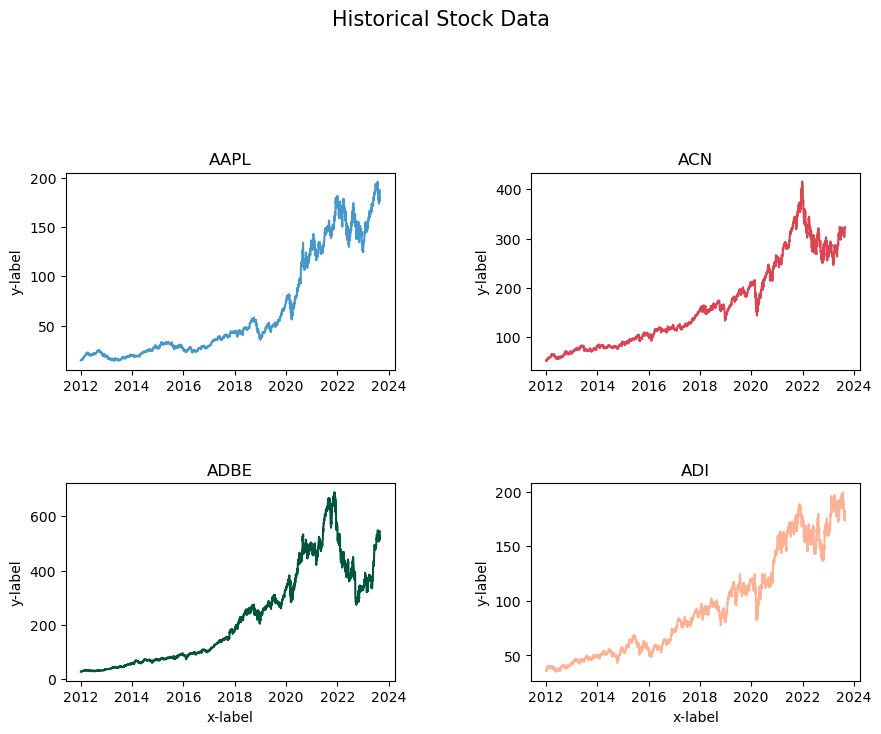

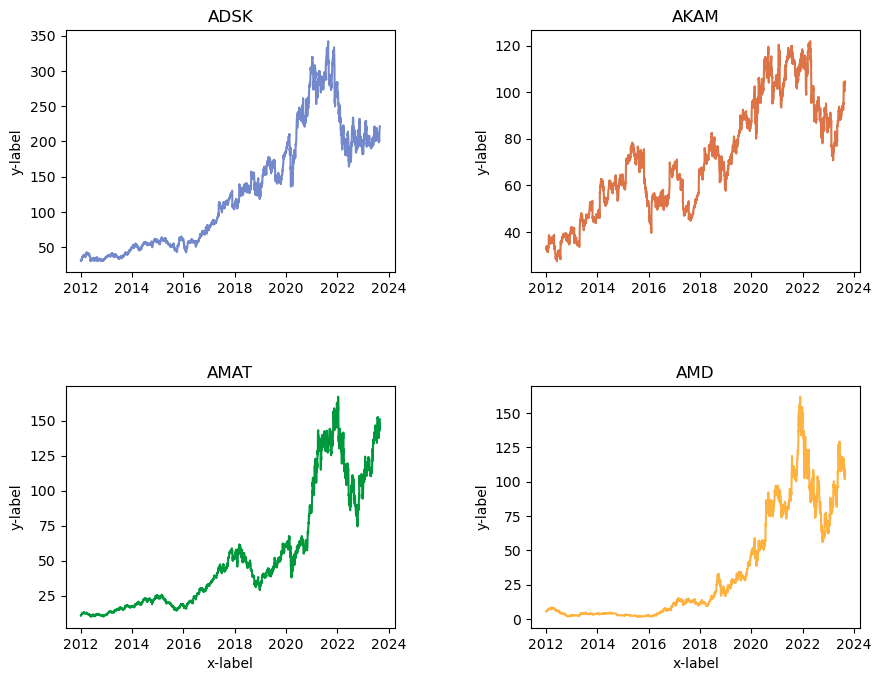

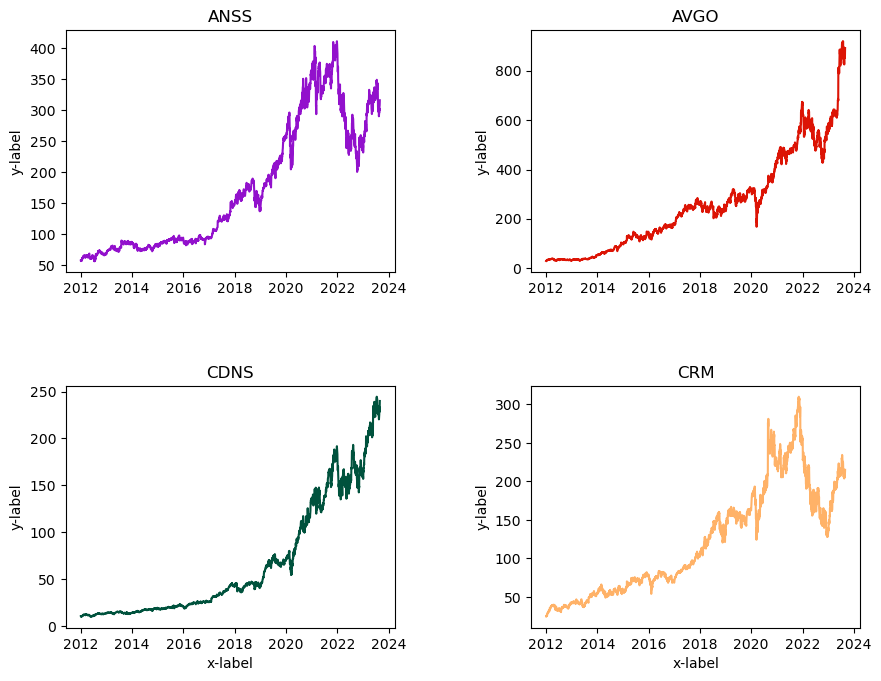

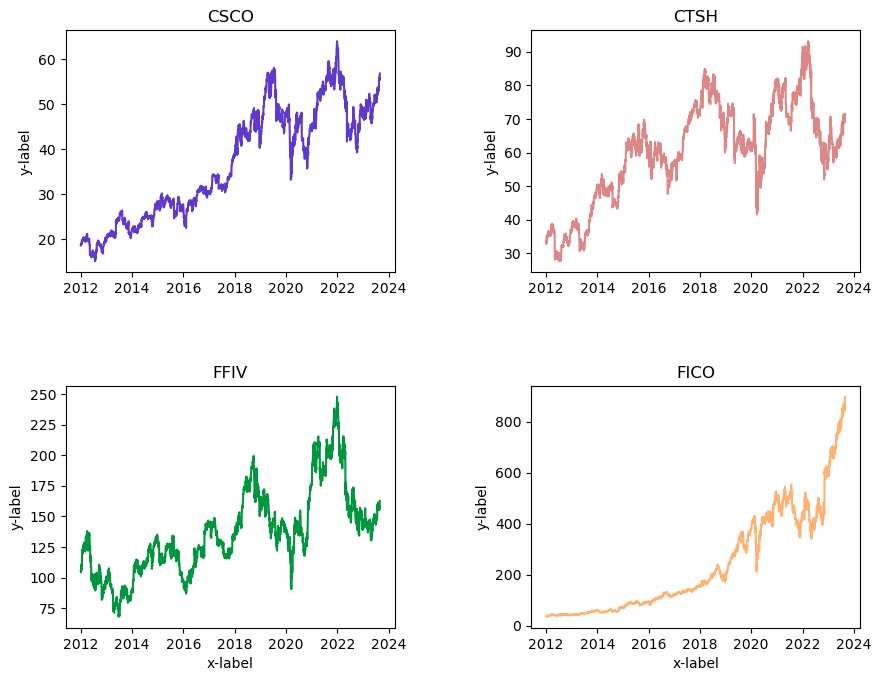

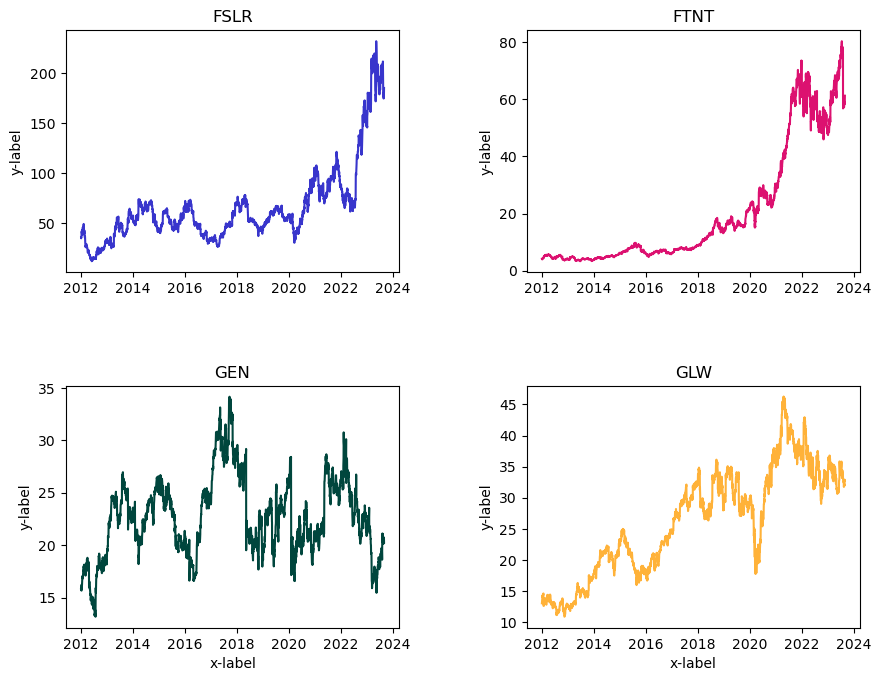

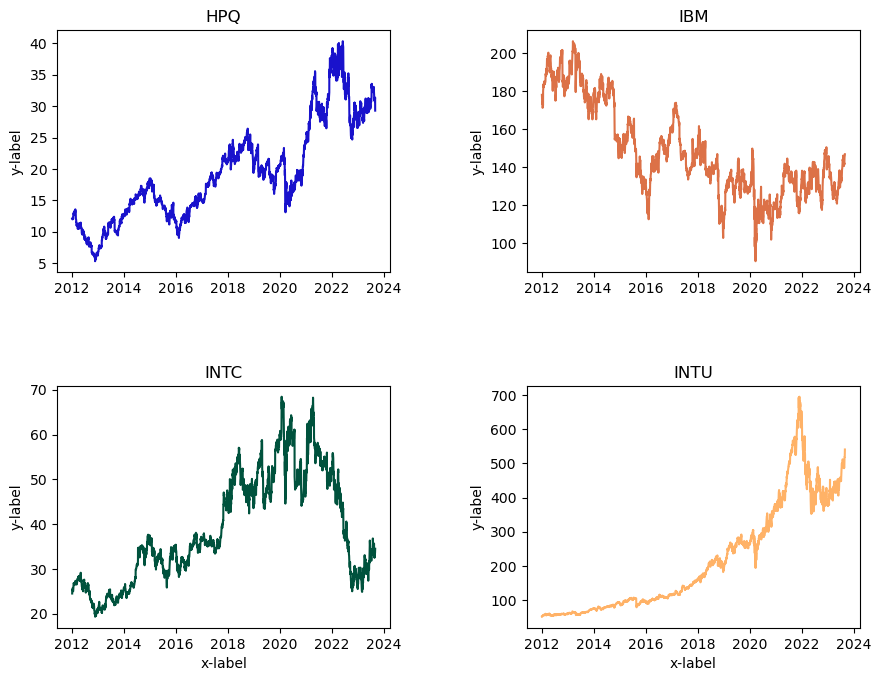

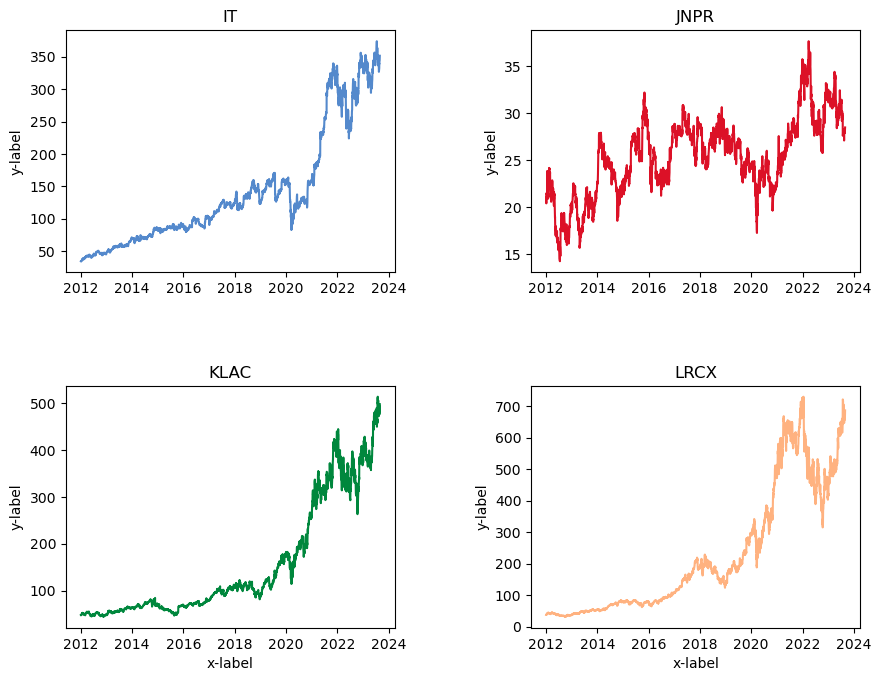

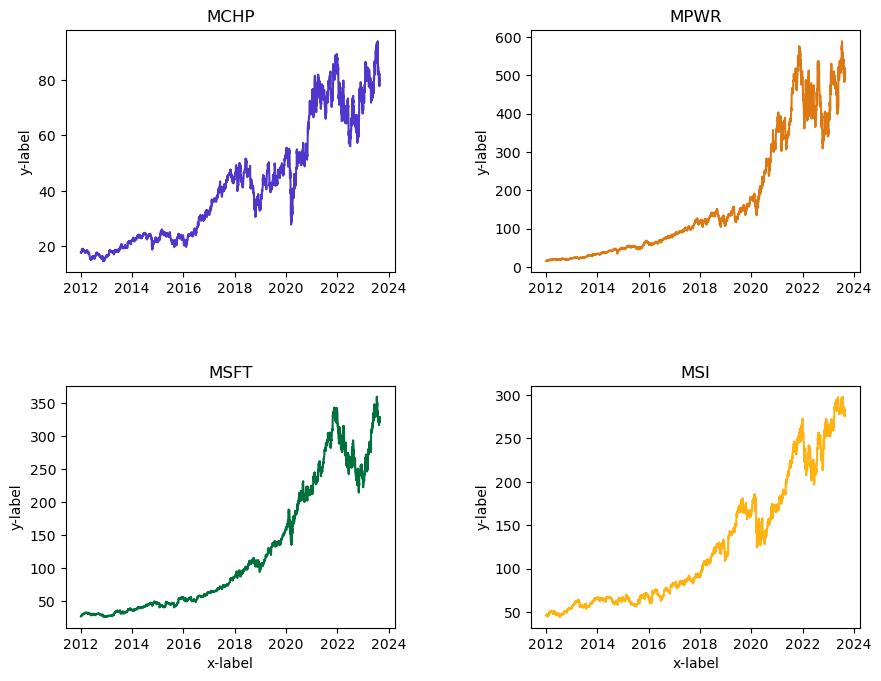

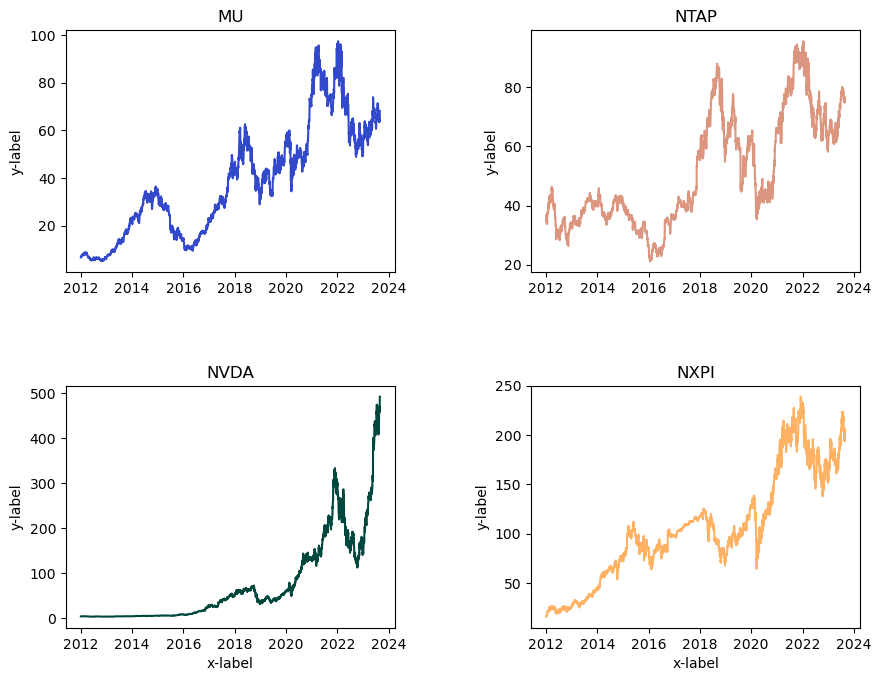

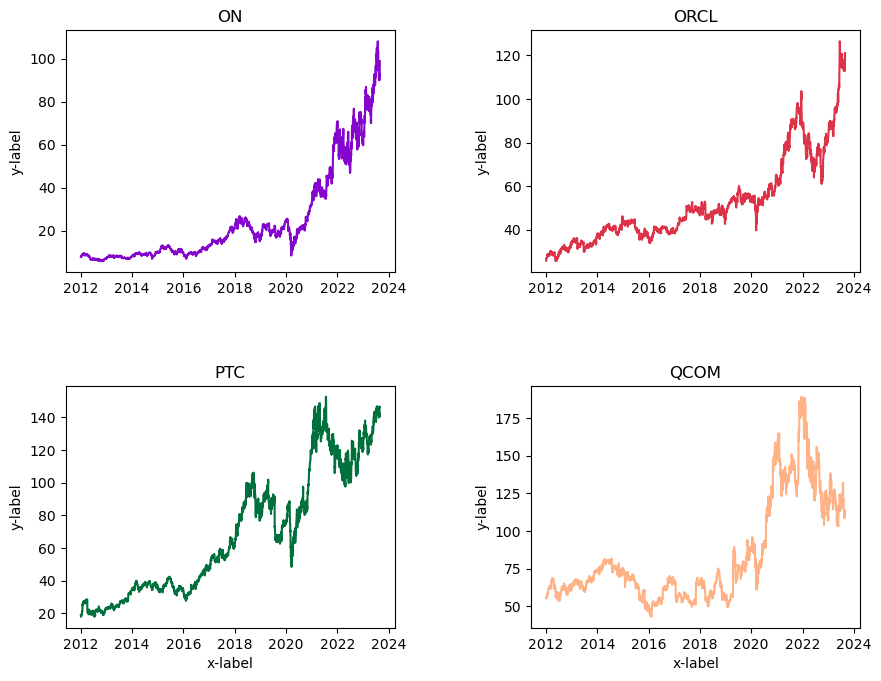

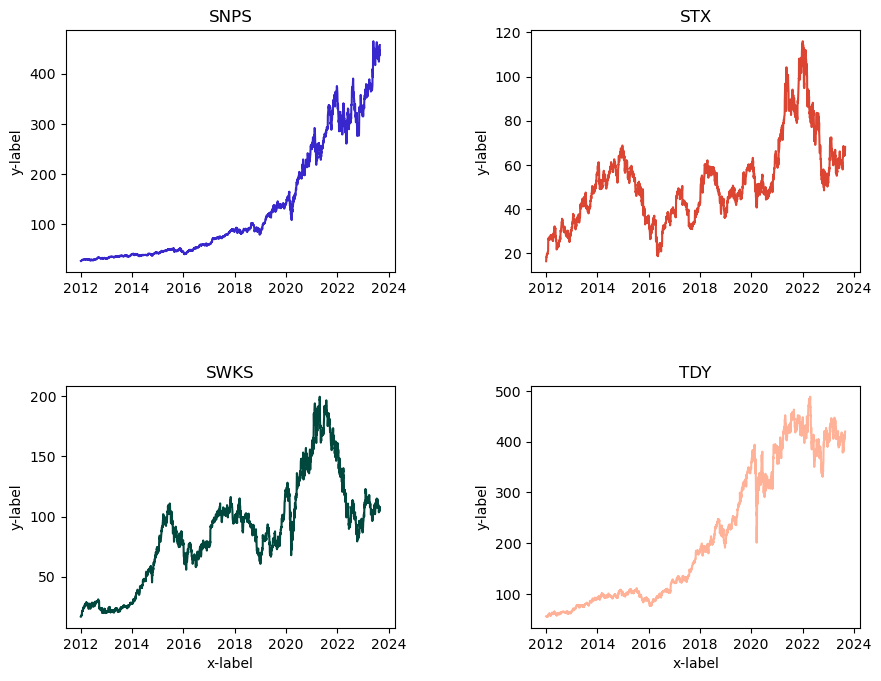

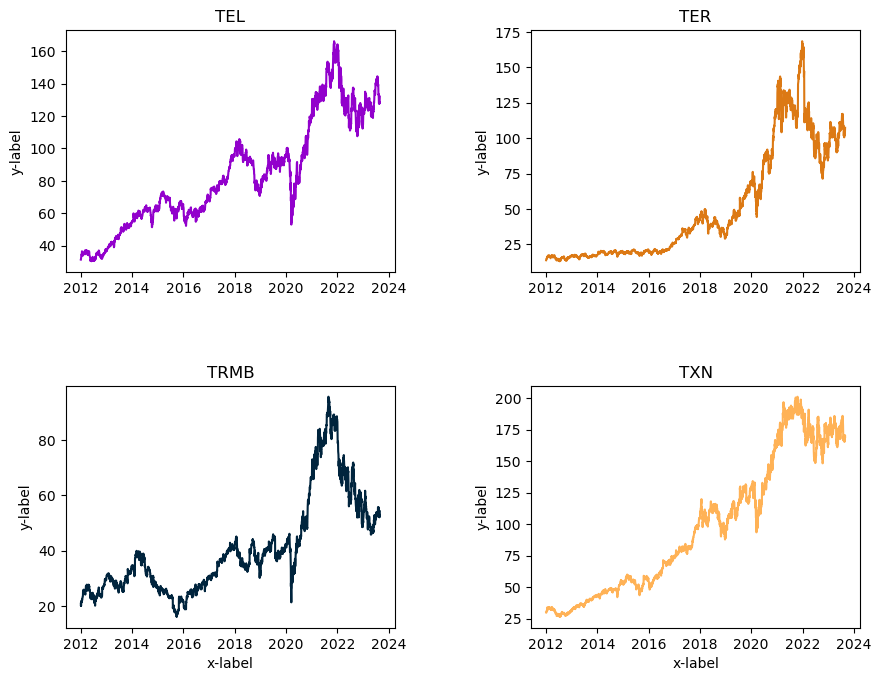

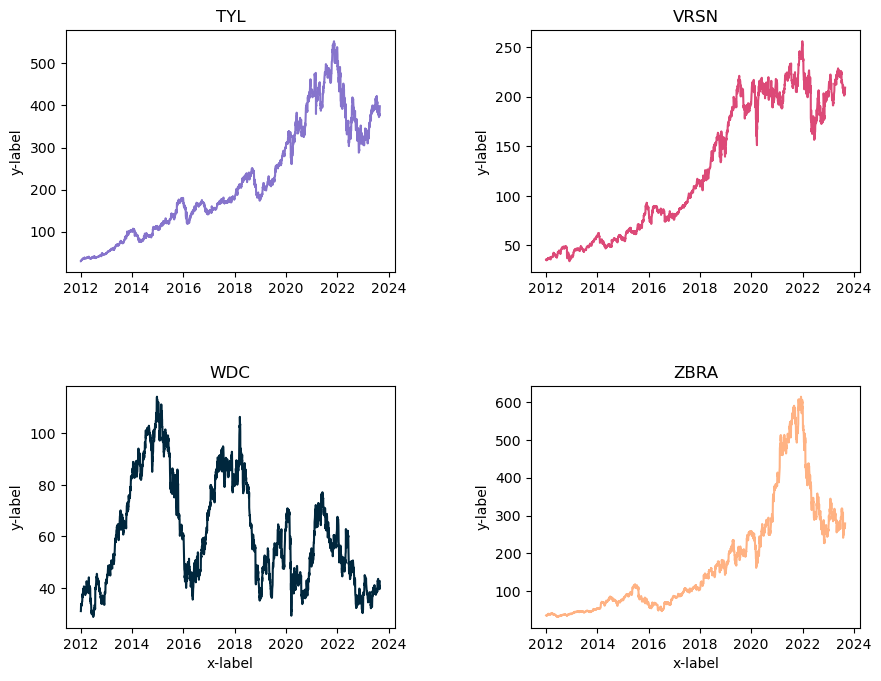

In [9]:
plotCharts(combined_df, 'Historical Stock Data')

# Implementation of the Markowitz's Modern Portfolio Theory

52 Portfolios of Technology companies from the S&P 500 are being considered

#### Important parameters


`Expected return for a portfolio` = `Transpose of weights of the assets within the portfolio` * `Expected return`

`StandardDeviation` or `Volatility` = squar root of (`Transpose of Weights of assets` * `variance-covariance` * `Weights of assests`)

`Risk free rate` is a return an investor can expect from an investment, given the risk associated is zero.

`Sharpe ratio` is a measure of risk-adjusted return

`Sharpe ratio` = (`ExpectedReturn` - `RiskFreeRate`) / `Variance`



<br>

## Daily Returns

<br>

The returns using the daily dataset was obtained for the individual portfolio.

In [10]:
RiskFreeRate = 3.8/100.0

In [11]:
# Get a list of all CSV files in a directory
csv_files = glob.glob('data/*.csv')

# Create an empty dataframe to store the combined data

daily_returns = pd.DataFrame()

for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    file_name = str(csv_file.split('.')[0].split('\\')[-1])
    if file_name in list(combined_df.columns):
        ind_daily_return = pd.DataFrame(combined_df[file_name].pct_change())
        daily_returns = pd.concat([daily_returns, ind_daily_return], axis=1)

In [12]:
# viewing the origin dataframe after calculating daily returns

daily_returns.head()

AAPL       ACN      ADBE       ADI      ADSK      AKAM  \
Date                                                                     
2012-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2012-01-04  0.005374 -0.000378 -0.010150 -0.001388 -0.019474 -0.014880   
2012-01-05  0.011102 -0.019082  0.007072  0.004447  0.020192 -0.000308   
2012-01-06  0.010454 -0.001733  0.008427 -0.006641  0.004542  0.010176   
2012-01-09 -0.001586 -0.001736 -0.006616  0.019498  0.003876 -0.004579   

                AMAT       AMD      ANSS      AVGO  ...      SWKS       TDY  \
Date                                                ...                       
2012-01-03       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2012-01-04  0.005607 -0.003650 -0.017250 -0.017271  ... -0.002378 -0.000537   
2012-01-05  0.006506  0.000000  0.015957  0.001406  ...  0.029797 -0.003943   
2012-01-06  0.016620 -0.005495 -0.006283 -0.006318  ... -0.007523  0.000180   
2012-01-09  0.029973  0.029466 -0.004566  0.067467  ...  0.038484 -0.006477   

                 TEL       TER      TRMB       TXN       TYL      VRSN  \
Date                                                                     
2012-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2012-01-04  0.002859  0.031273 -0.034110 -0.006384  0.000659  0.000000   
2012-01-05  0.011086  0.031030  0.013927  0.007102  0.024045 -0.002233   
2012-01-06  0.013784  0.000684 -0.015207  0.000000  0.023159 -0.009513   
2012-01-09  0.013906  0.017772  0.039601  0.012760 -0.007859 -0.010735   

                 WDC      ZBRA  
Date                            
2012-01-03       NaN       NaN  
2012-01-04  0.010329 -0.007559  
2012-01-05  0.046645 -0.001410  
2012-01-06  0.022283 -0.008192  
2012-01-09  0.007763 -0.004557  

[5 rows x 52 columns]

In [13]:
# This was written to view the dataframe from the current to the earliest dates, that is, reversing the order of the dataframe
# And the multiplication by 100 was done to express the returns as percentages which is the required way to express them

daily_returns = daily_returns.sort_values(['Date'], ascending=False)
daily_returns.head().mul(100)

AAPL       ACN      ADBE       ADI      ADSK      AKAM  \
Date                                                                     
2023-08-30  1.917227 -0.061837  0.886098 -0.542283  0.979949  0.229882   
2023-08-29  2.181027  0.791502  2.009742  1.236620  1.064074  1.143190   
2023-08-28  0.884609  0.674487  0.925606  1.218005  0.541866  0.389030   
2023-08-25  1.264313  1.470680  2.464728  2.573552  3.509104  1.151006   
2023-08-24 -2.617044 -0.380536 -3.444448 -2.135449  2.074772 -0.771183   

                AMAT       AMD      ANSS      AVGO  ...      SWKS       TDY  \
Date                                                ...                       
2023-08-30  0.646754  0.632551  0.556952  0.264070  ...  0.185567  0.516858   
2023-08-29  3.135743  3.225803  1.966574  3.350441  ...  1.487761  0.427751   
2023-08-28  0.734273  0.352079  1.069231  1.087085  ...  0.768572  1.855346   
2023-08-25  1.291045  0.442040  2.120183 -0.308969  ...  1.112919  0.628076   
2023-08-24 -3.702700 -6.972491 -1.410028 -2.523443  ... -2.797724 -1.394081   

                 TEL       TER      TRMB       TXN       TYL      VRSN  \
Date                                                                     
2023-08-30  0.564061  0.000000  0.018433 -0.855355  1.626700  0.853624   
2023-08-29  1.109828  2.677635  1.840038  1.179612  1.910214  0.397040   
2023-08-28  0.862874  0.761227  2.128468  0.530361  1.441430  0.383977   
2023-08-25  0.846661  1.635489 -0.210478  1.340662  0.978357  1.564890   
2023-08-24 -1.093280 -3.047853 -1.803839 -2.496618 -1.367273 -1.276863   

                 WDC      ZBRA  
Date                            
2023-08-30  2.334539  2.054918  
2023-08-29  0.338080  1.322606  
2023-08-28  4.861985  0.570065  
2023-08-25 -0.953090  0.928851  
2023-08-24 -2.874543 -1.543924  

[5 rows x 52 columns]

<br>
<br>

## Charting the Daily Returns Data

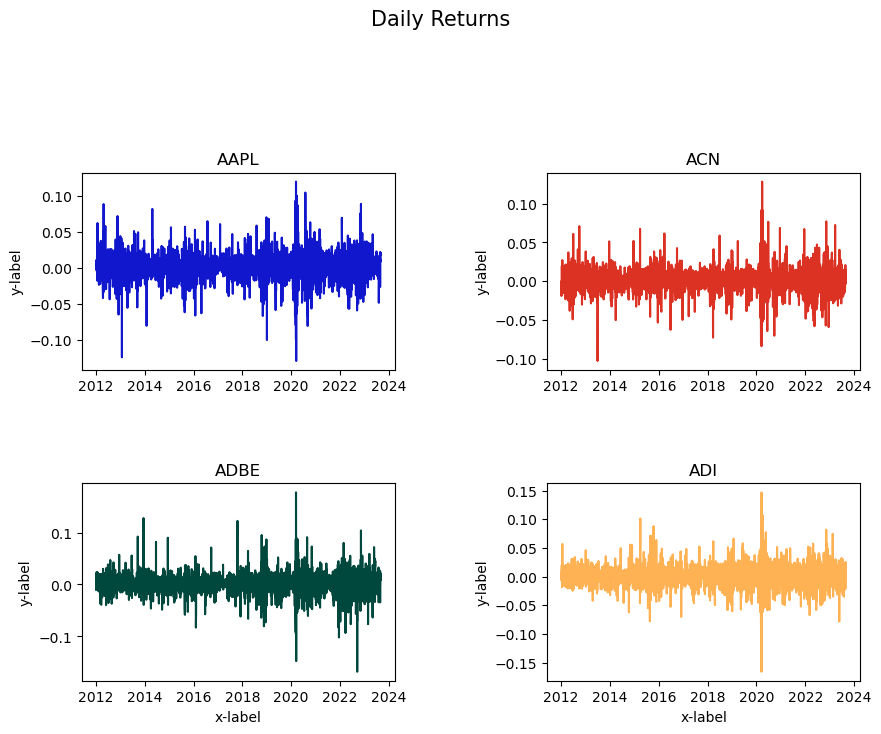

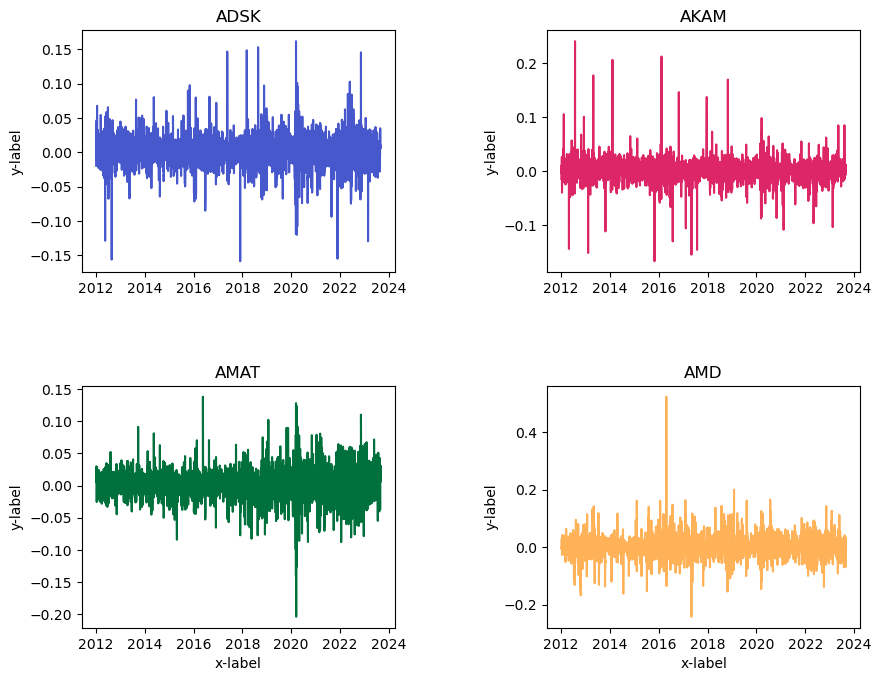

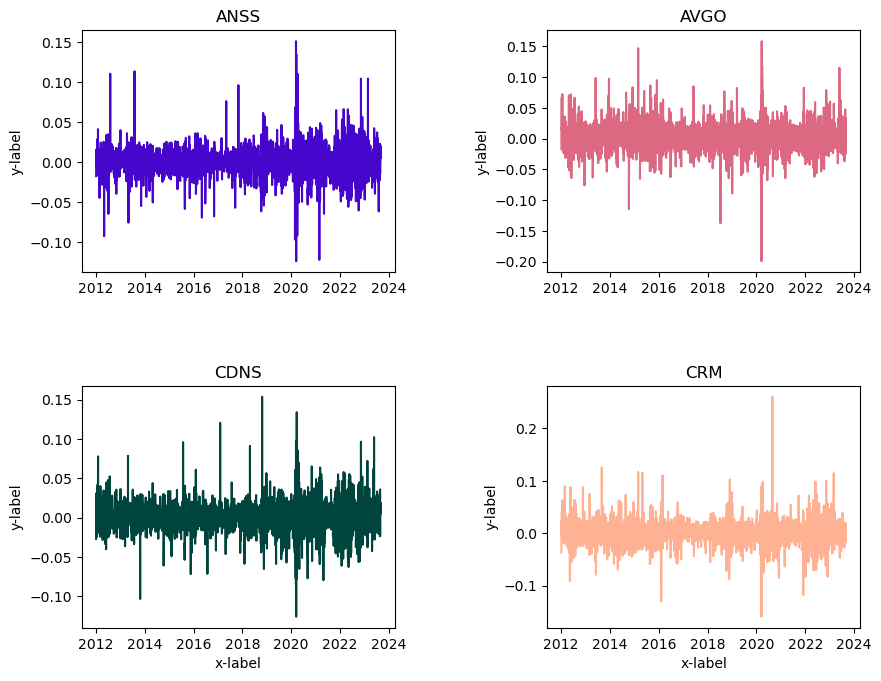

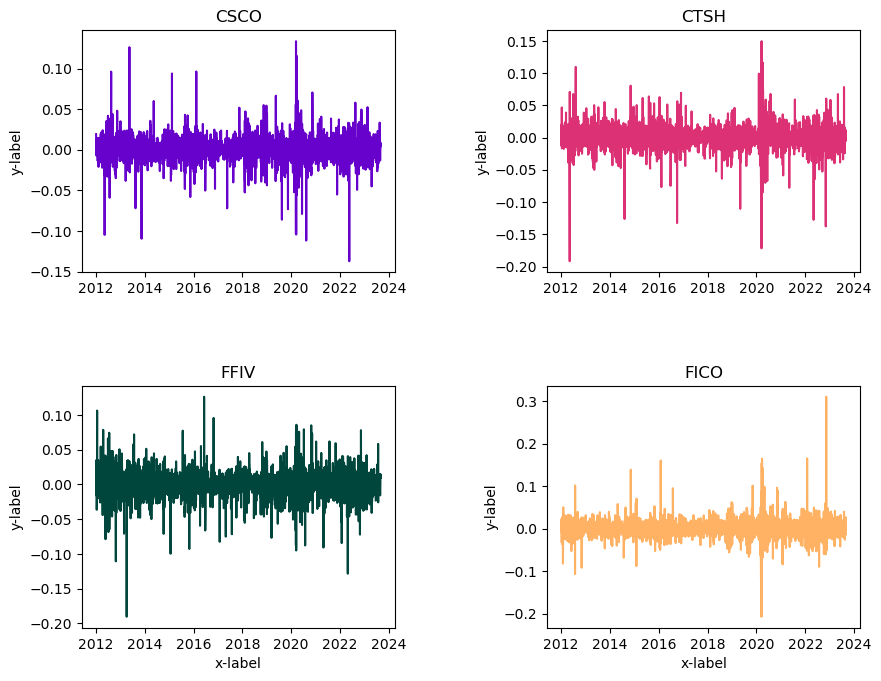

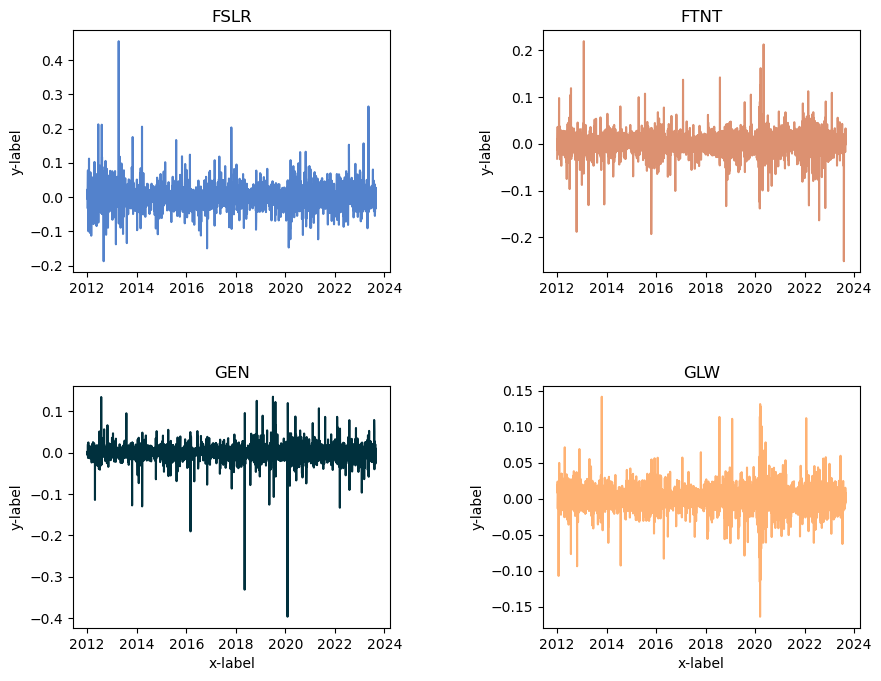

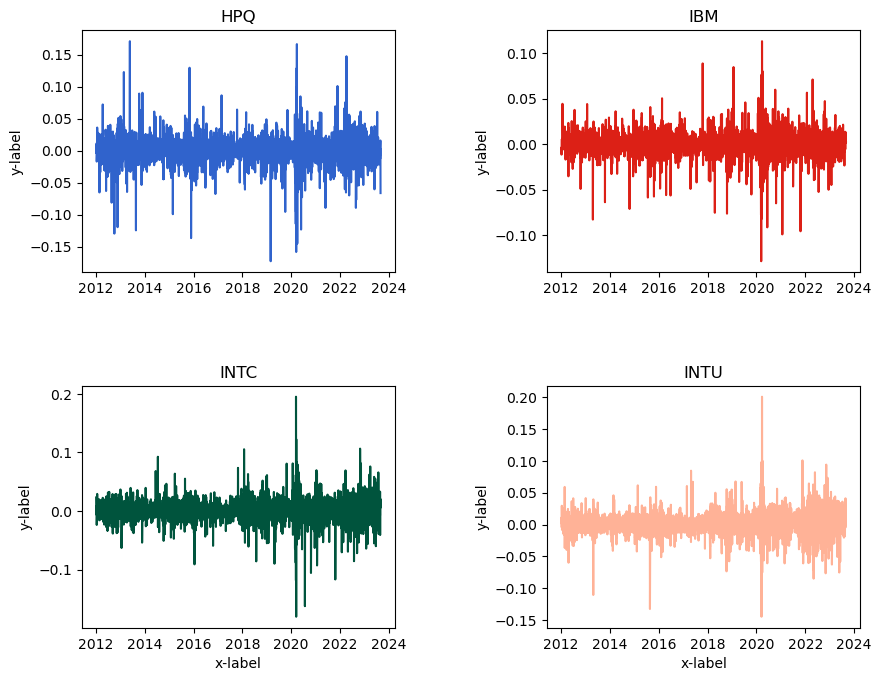

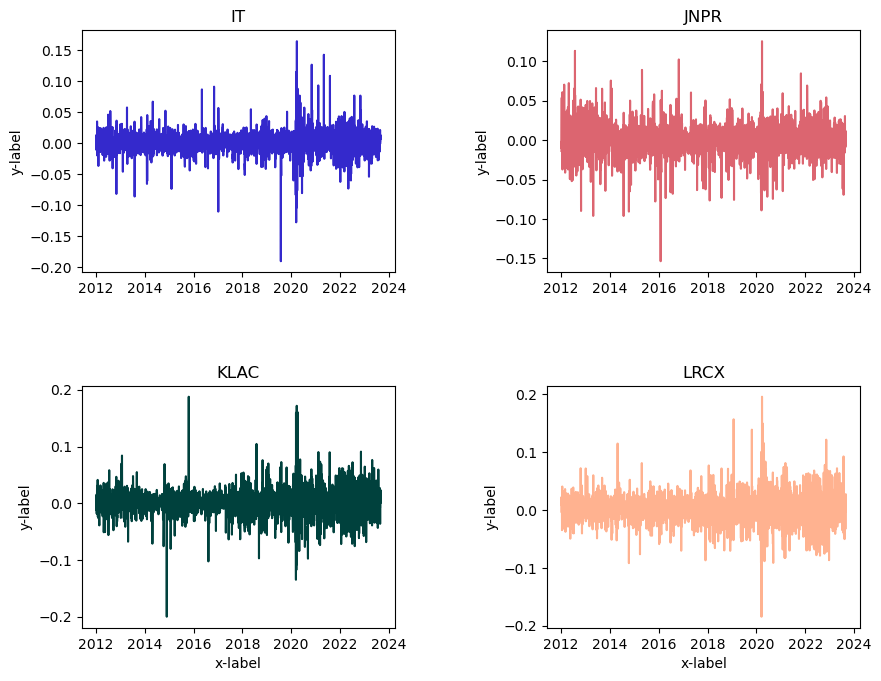

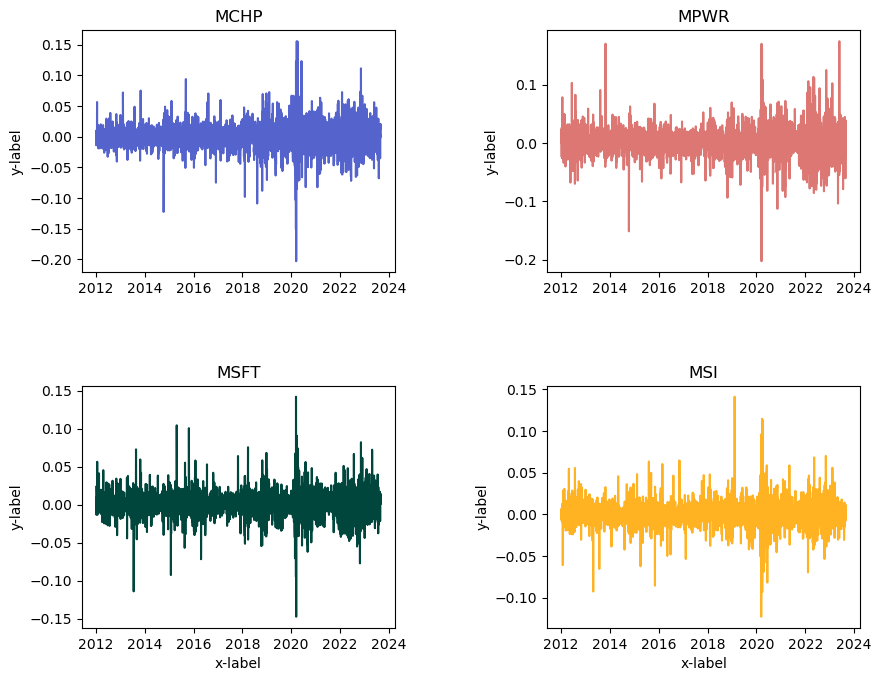

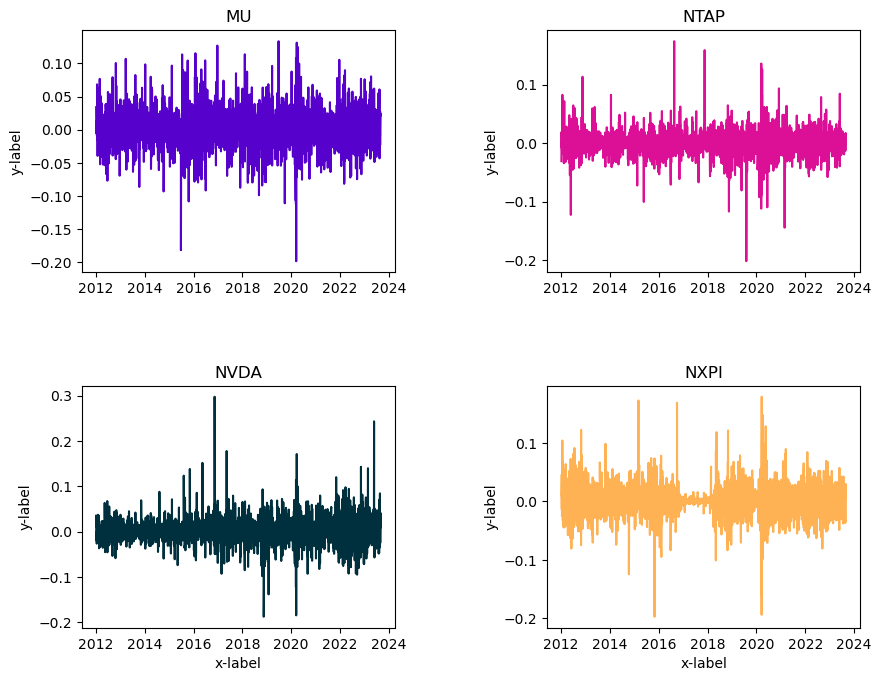

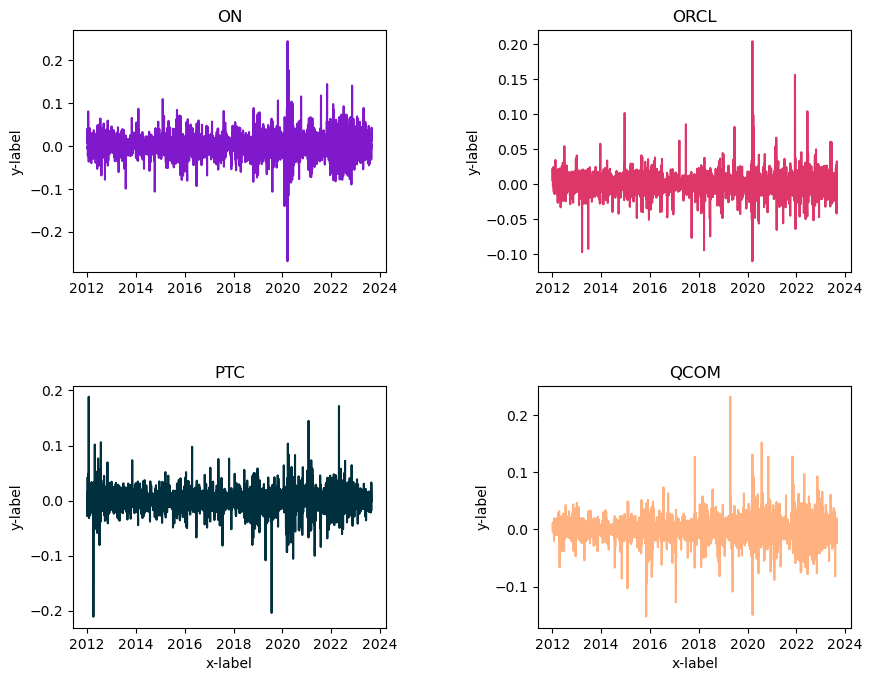

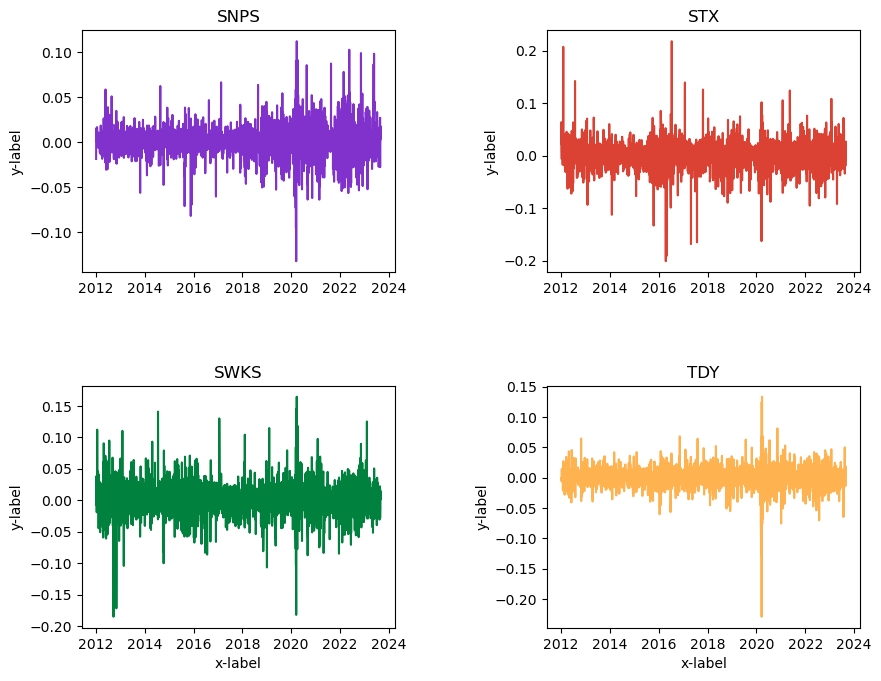

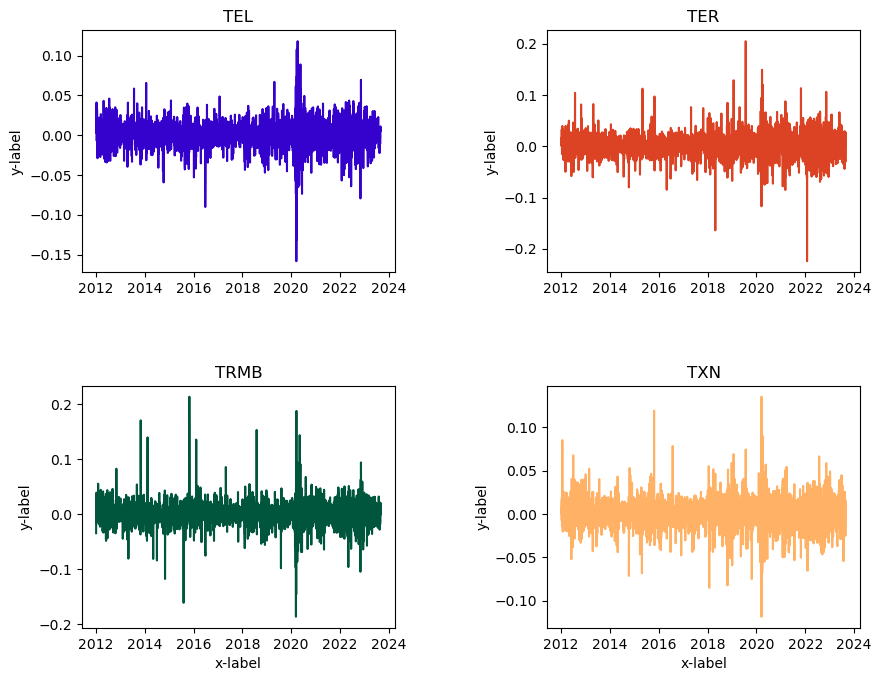

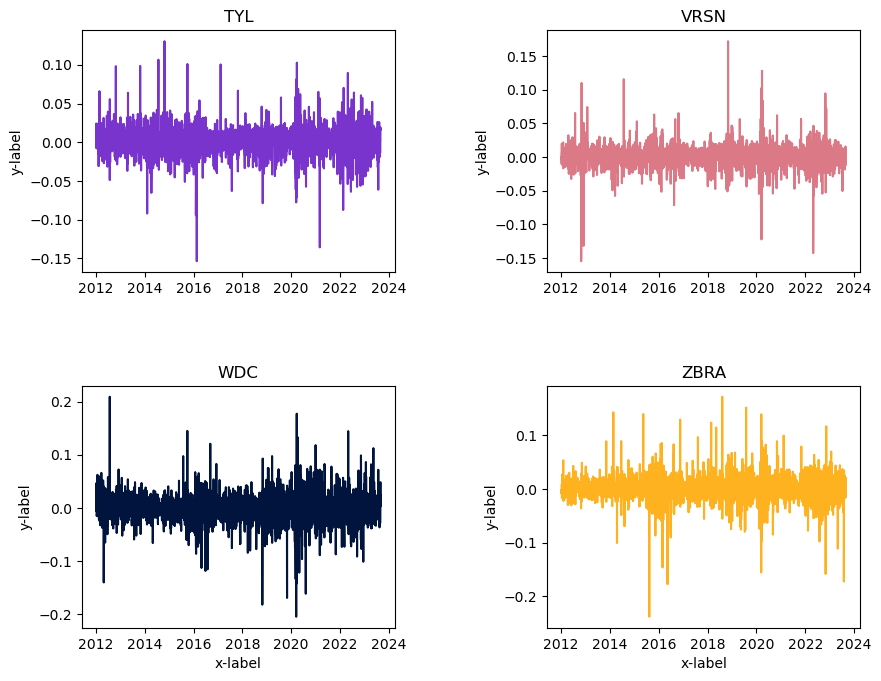

In [15]:
plotCharts(daily_returns, 'Daily Returns')

<br>
<br>

## Monthly Returns

The percentage returns per month for each portfolio.

**The `'M'` passed into the resample function was used to achieve this**

In [16]:
# Get a list of all CSV files in a directory
csv_files = glob.glob('data/*.csv')

# Create an empty dataframe to store the combined data

monthly_returns = pd.DataFrame()

for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    file_name = str(csv_file.split('.')[0].split('\\')[-1])
    if file_name in list(combined_df.columns):
        ind_monthly_return = pd.DataFrame(combined_df[file_name].resample('M').ffill().pct_change())
        monthly_returns = pd.concat([monthly_returns, ind_monthly_return], axis=1)


In [17]:
monthly_returns = monthly_returns.sort_values(['Date'], ascending=False)
monthly_returns.head().mul(100)

AAPL       ACN       ADBE       ADI      ADSK       AKAM  \
Date                                                                       
2023-08-31 -4.479513  2.181127  -0.148305 -9.001149  4.509646  10.730158   
2023-07-31  1.278546  2.517992  11.693489  2.422874  3.606864   5.151883   
2023-06-30  9.433005  0.869500  17.042050  9.634755  2.617986  -2.442466   
2023-05-31  4.461343  9.144102  10.655263 -1.217480  2.361521  12.382581   
2023-04-30  2.898726 -1.931349  -2.026623 -8.792210 -6.422949   4.687098   

                 AMAT        AMD      ANSS       AVGO  ...       SWKS  \
Date                                                   ...              
2023-08-31  -0.422191  -6.826928 -7.641045  -0.708840  ...  -5.587129   
2023-07-31   4.877545   0.430162  3.581923   3.599141  ...   3.324601   
2023-06-30   8.432100  -3.637590  2.064339   7.360509  ...   6.936528   
2023-05-31  17.933296  32.270331  3.080397  28.964090  ...  -2.256846   
2023-04-30  -7.978509  -8.815426 -5.673070  -2.344356  ... -10.239024   

                 TDY        TEL        TER       TRMB        TXN       TYL  \
Date                                                                         
2023-08-31  9.242454  -8.056319  -4.931821   0.836433  -5.983336  0.335322   
2023-07-31 -6.465420   2.375857   1.446151   1.624481  -0.011112 -4.763848   
2023-06-30  5.778976  14.435010  11.118874  13.434757   3.531170  4.914856   
2023-05-31 -6.213803   0.089891   9.641065  -0.912951   3.995220  4.730494   
2023-04-30 -7.367666  -6.694618 -15.003260 -10.148799 -10.112359  6.877392   

                VRSN        WDC       ZBRA  
Date                                        
2023-08-31 -0.867505  -0.093987  -9.368102  
2023-07-31 -6.646902  12.206699   4.100329  
2023-06-30  1.186635  -2.065582  12.667090  
2023-05-31  0.685304  12.456449  -8.839354  
2023-04-30  4.954337  -8.574460  -9.424529  

[5 rows x 52 columns]

<br>
<br>

### Charting the Monthly Returns Data

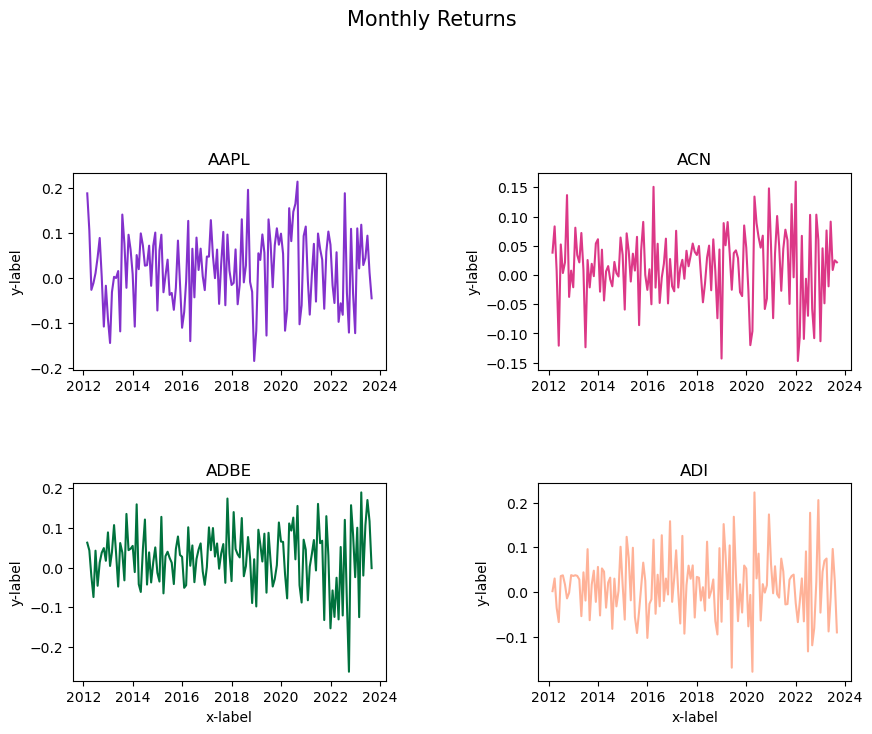

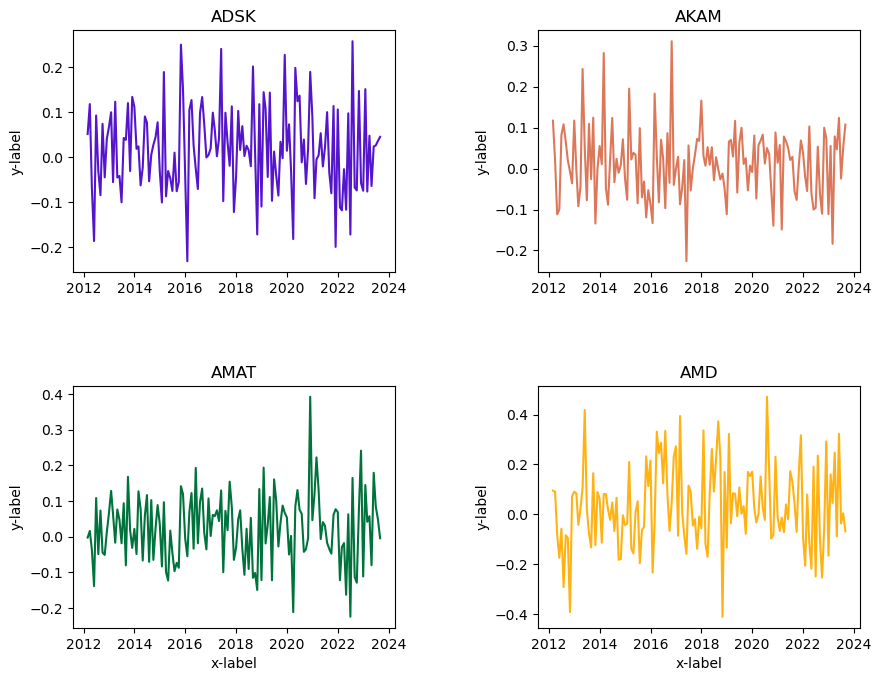

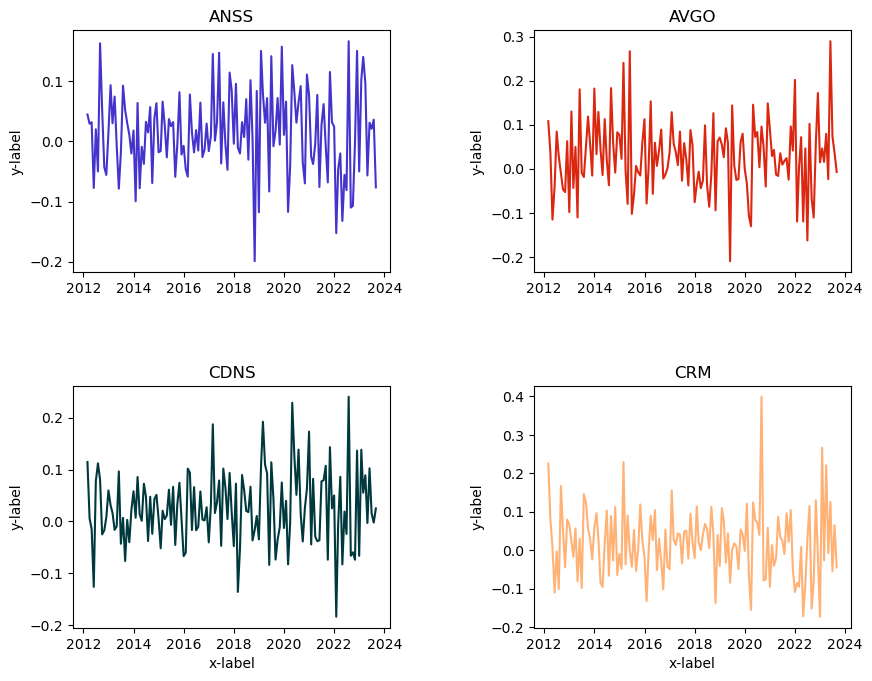

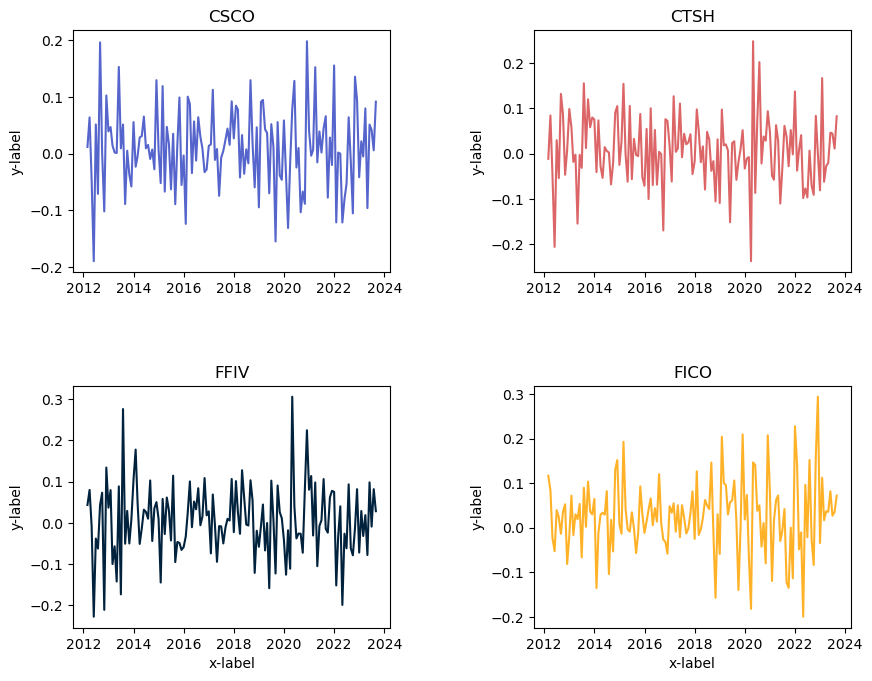

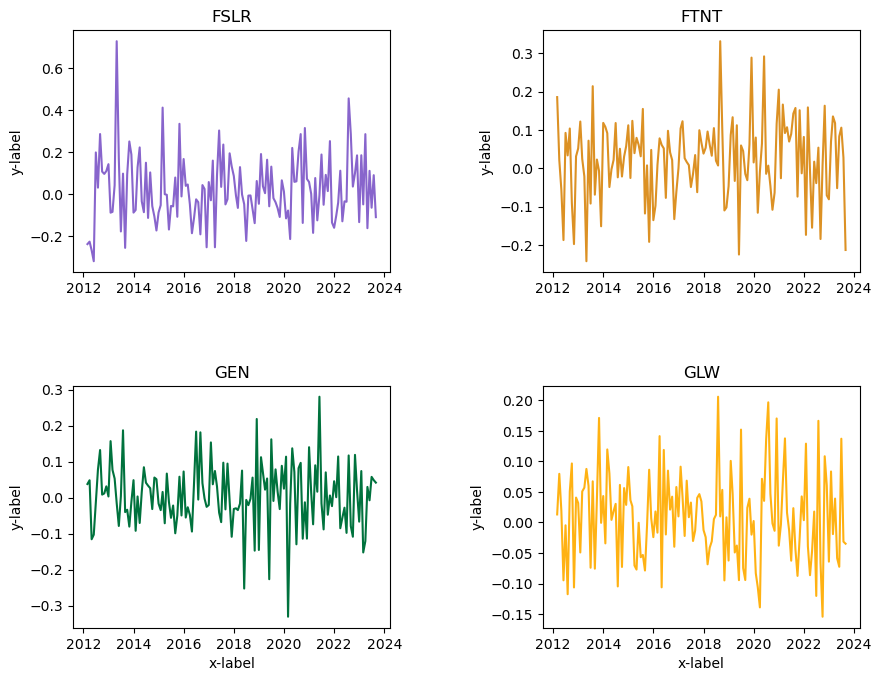

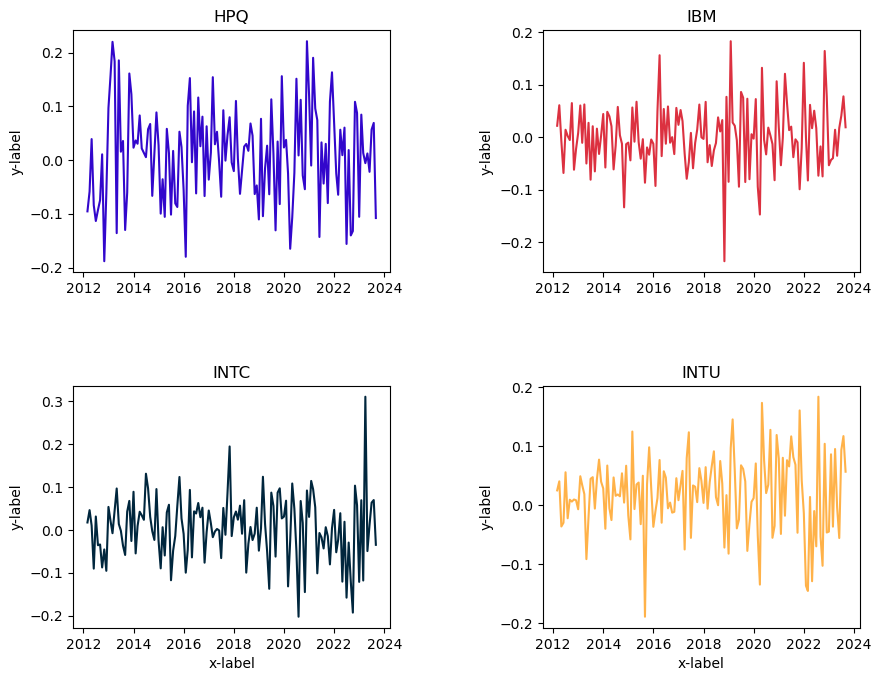

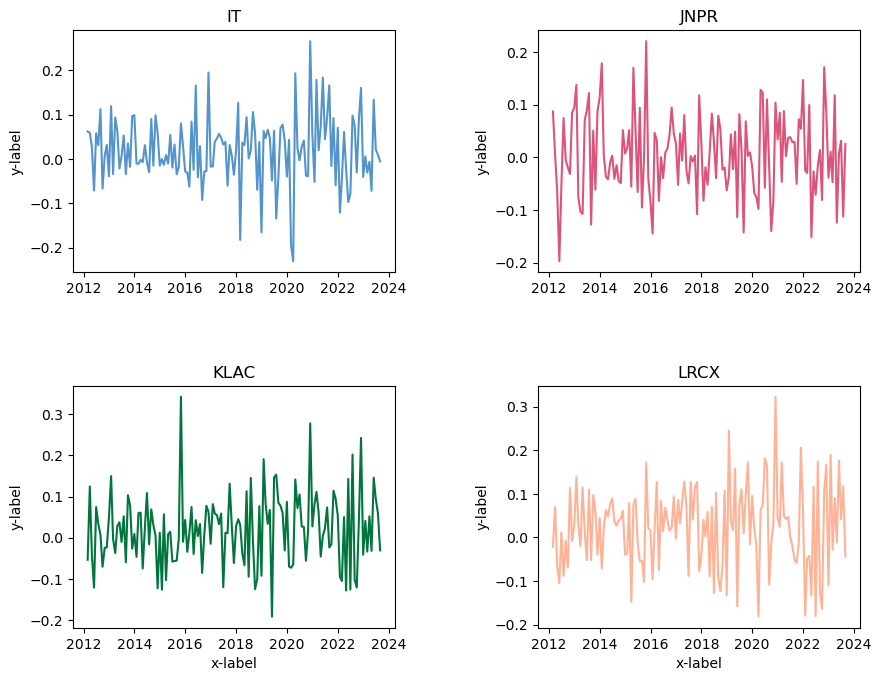

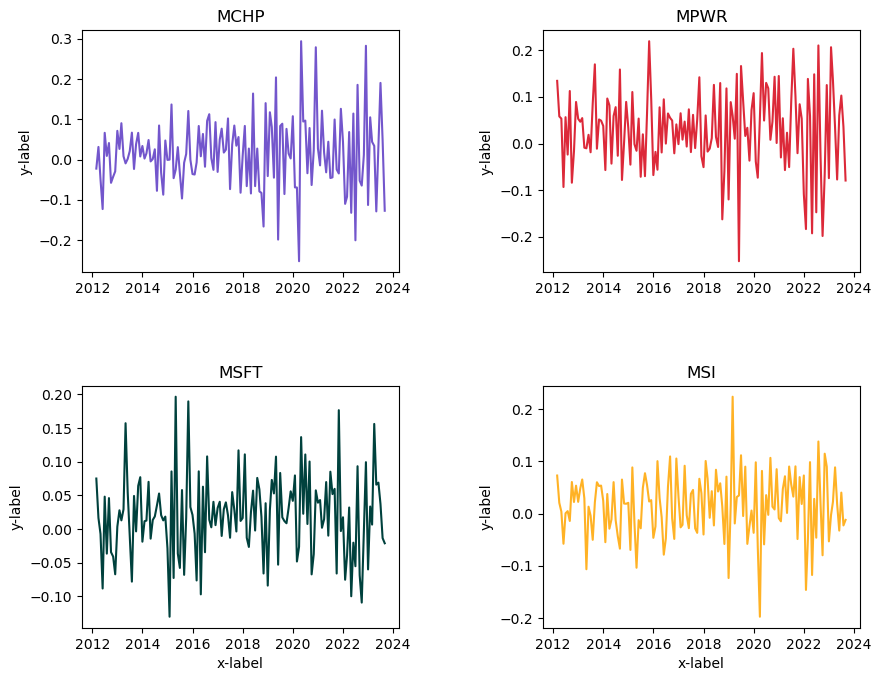

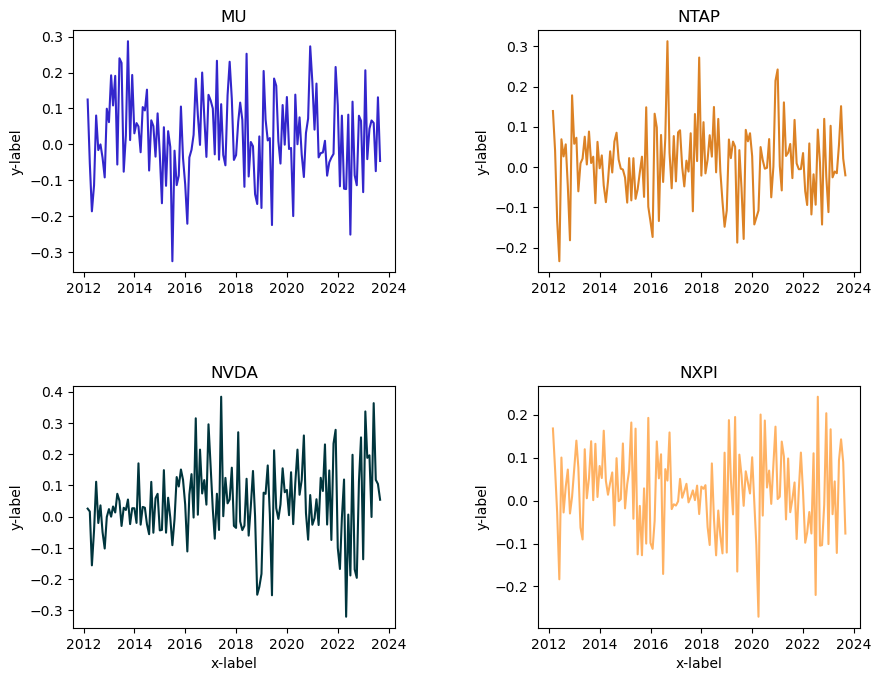

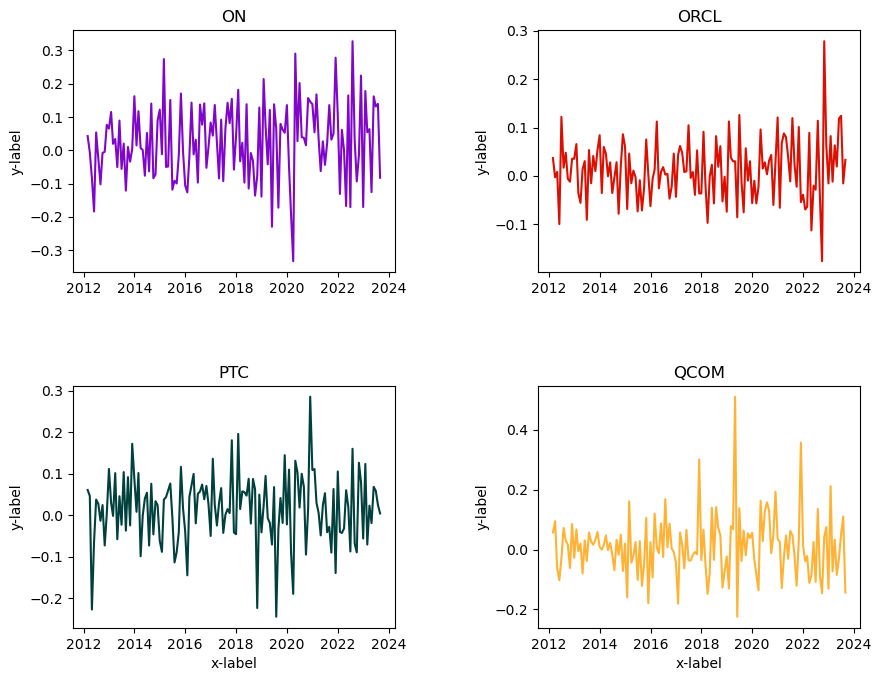

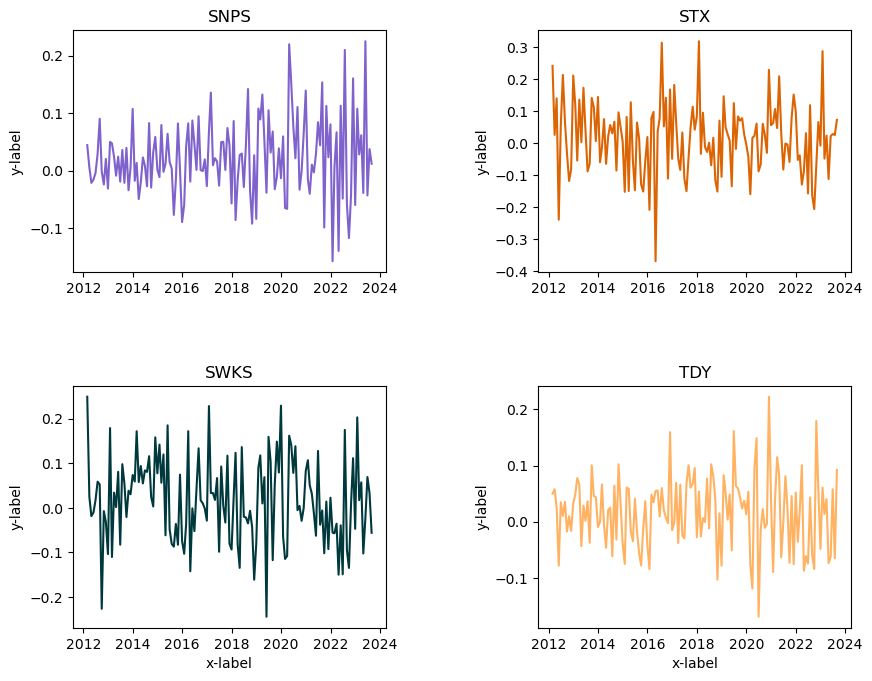

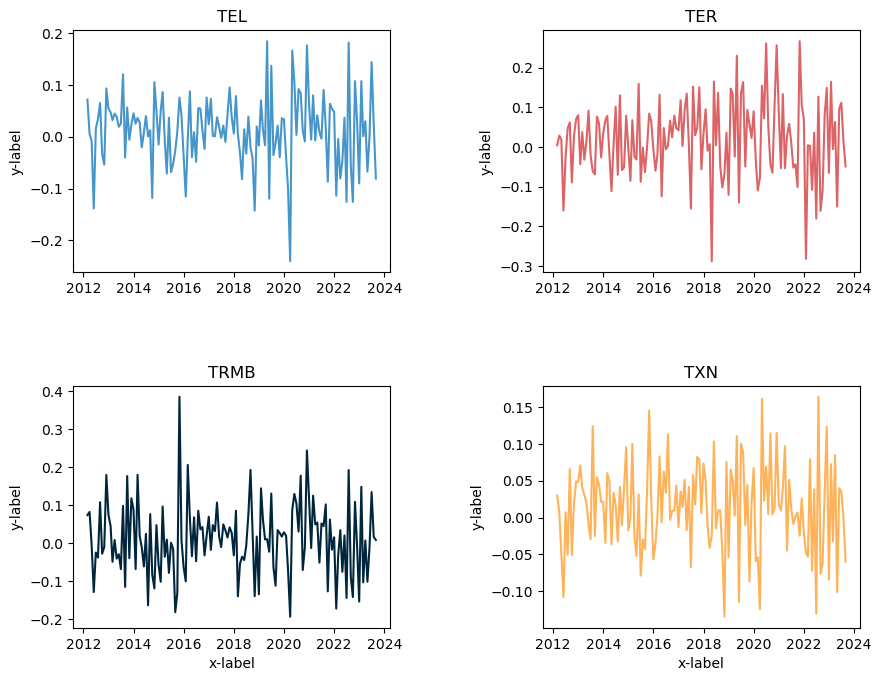

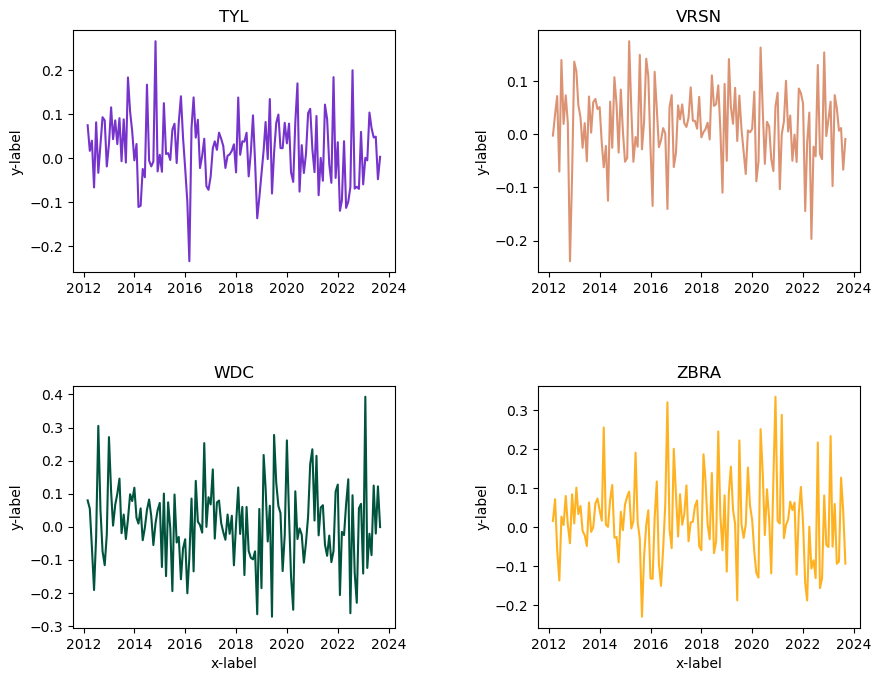

In [18]:
plotCharts(monthly_returns, 'Monthly Returns')

<br>
<br>

## Cummulative Returns.

This can be used to view how one's investment over the years would have progressed had one invested in the past.

### Daily Cummulative Returns

In [19]:
# Computing the daily cummulative returns
DailyCummulativeReturns = (daily_returns.sort_values(['Date'], ascending=True) + 1).cumprod()

DailyCummulativeReturns.head()

AAPL       ACN     ADBE       ADI      ADSK      AKAM  \
Date                                                                    
2012-01-03       NaN       NaN      NaN       NaN       NaN       NaN   
2012-01-04  1.005374  0.999622  0.98985  0.998612  0.980526  0.985120   
2012-01-05  1.016536  0.980548  0.99685  1.003053  1.000325  0.984816   
2012-01-06  1.027162  0.978848  1.00525  0.996392  1.004869  0.994837   
2012-01-09  1.025533  0.977148  0.99860  1.015820  1.008763  0.990282   

                AMAT       AMD      ANSS      AVGO  ...      SWKS       TDY  \
Date                                                ...                       
2012-01-03       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2012-01-04  1.005607  0.996350  0.982750  0.982729  ...  0.997622  0.999463   
2012-01-05  1.012150  0.996350  0.998432  0.984111  ...  1.027348  0.995521   
2012-01-06  1.028972  0.990876  0.992159  0.977893  ...  1.019620  0.995701   
2012-01-09  1.059813  1.020073  0.987629  1.043869  ...  1.058858  0.989251   

                 TEL       TER      TRMB       TXN       TYL      VRSN  \
Date                                                                     
2012-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2012-01-04  1.002859  1.031273  0.965890  0.993616  1.000659  1.000000   
2012-01-05  1.013977  1.063273  0.979342  1.000672  1.024720  0.997767   
2012-01-06  1.027954  1.064000  0.964449  1.000672  1.048451  0.988275   
2012-01-09  1.042249  1.082909  1.002642  1.013441  1.040211  0.977666   

                 WDC      ZBRA  
Date                            
2012-01-03       NaN       NaN  
2012-01-04  1.010329  0.992441  
2012-01-05  1.057456  0.991041  
2012-01-06  1.081020  0.982923  
2012-01-09  1.089413  0.978443  

[5 rows x 52 columns]

<br>

### Daily Cummulative Returns Charts

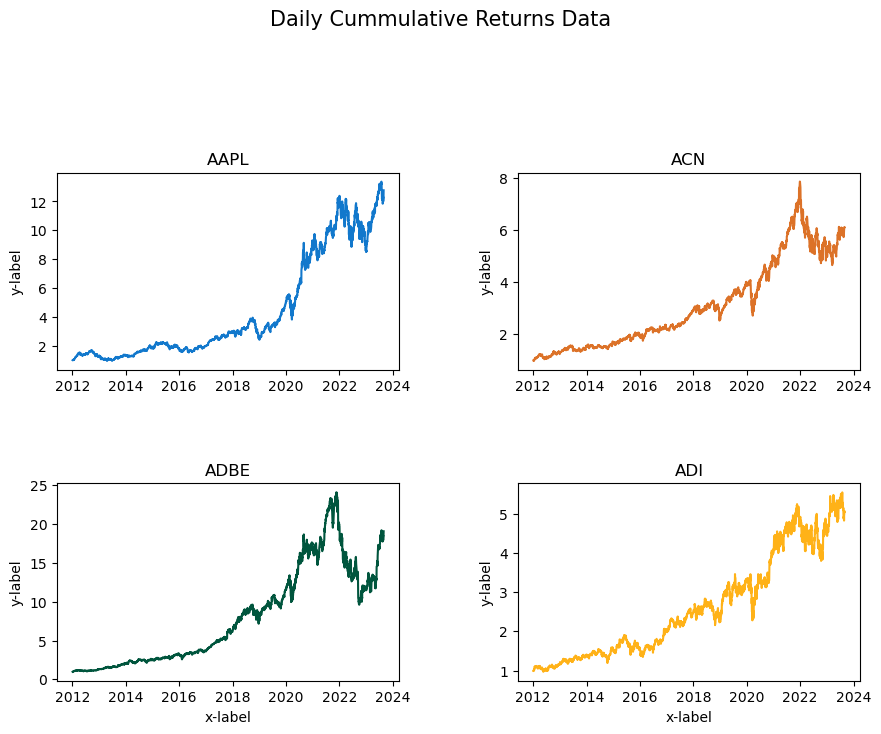

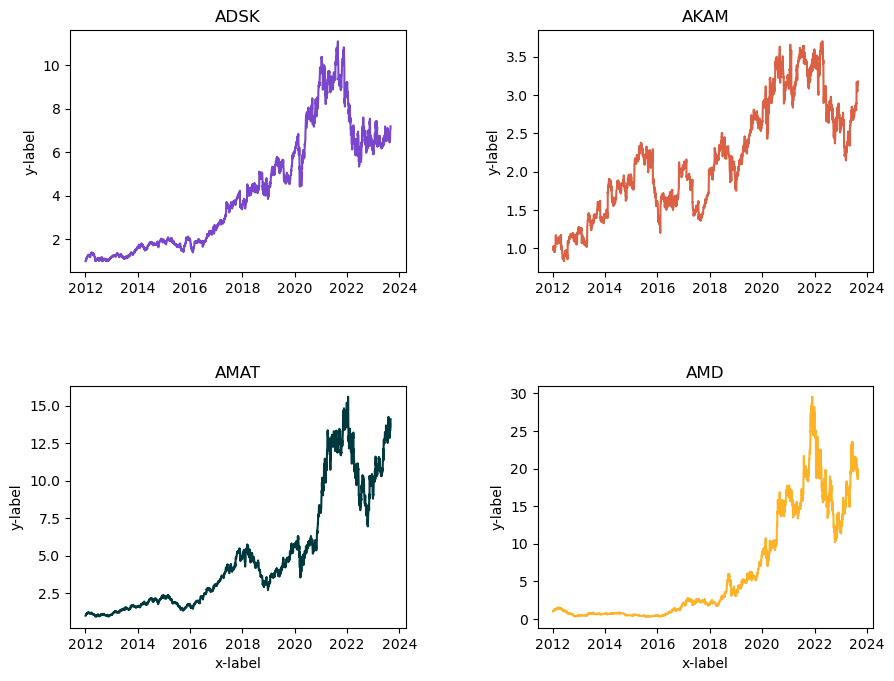

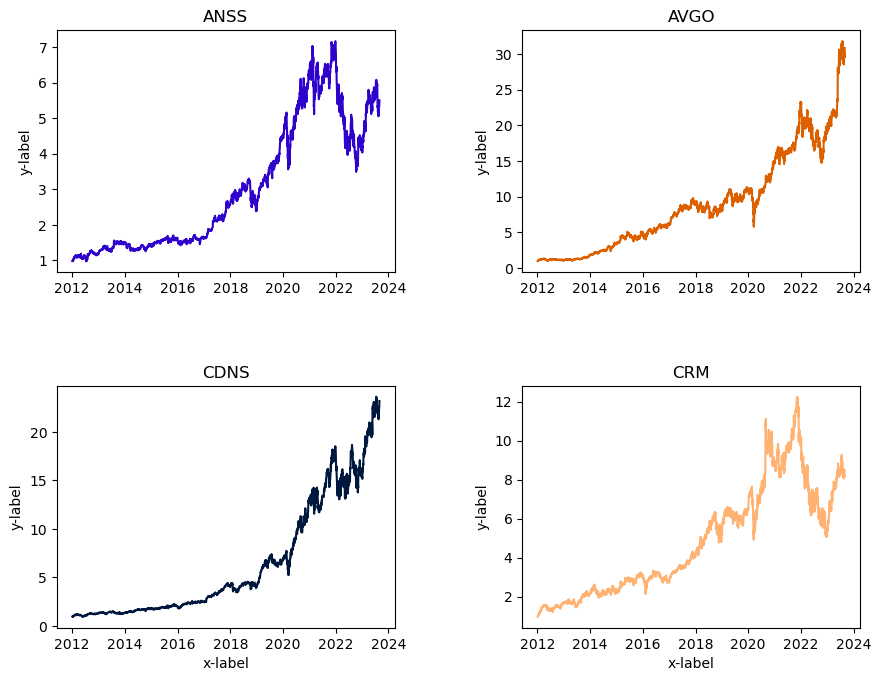

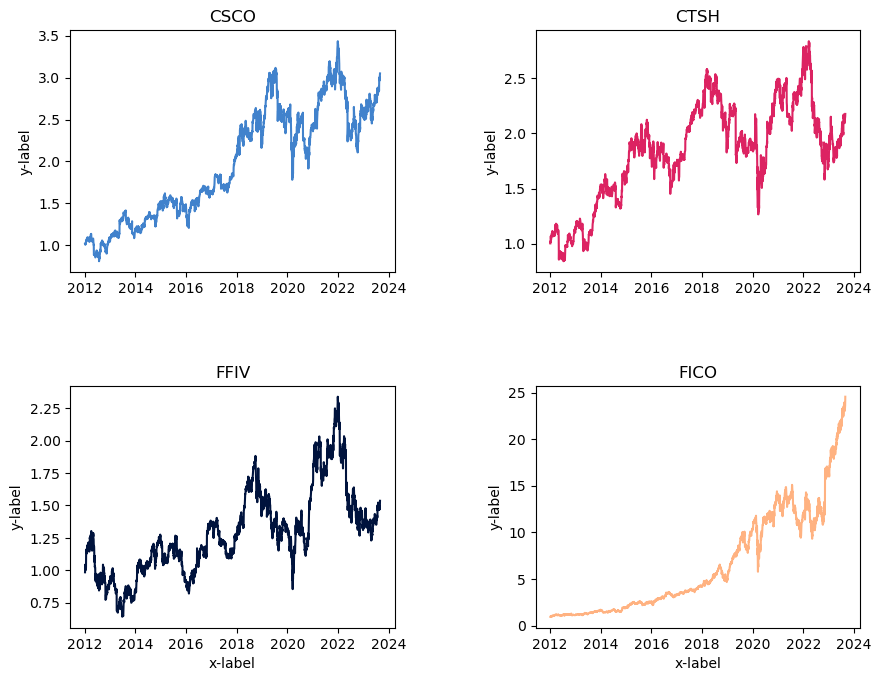

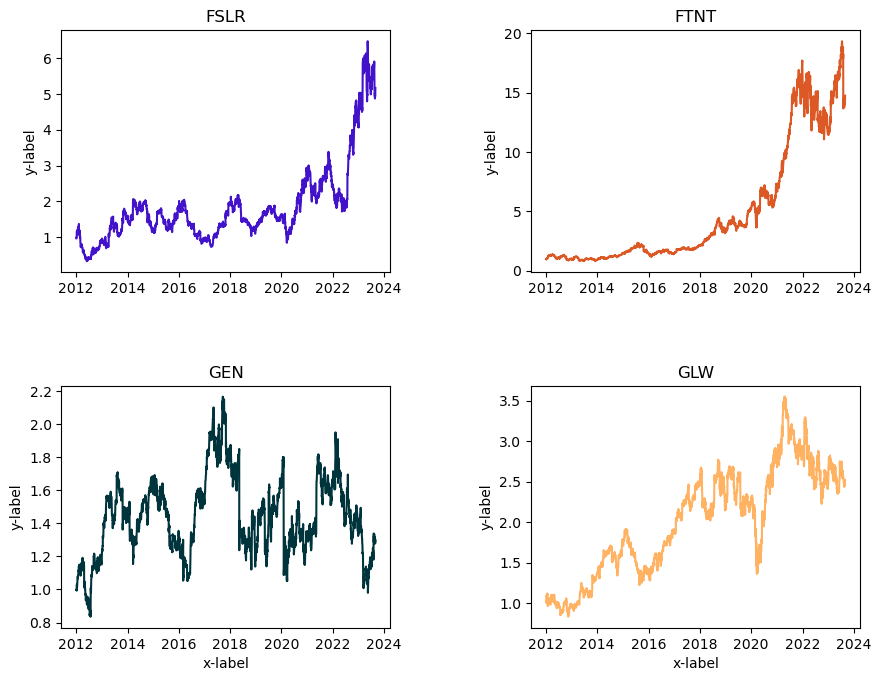

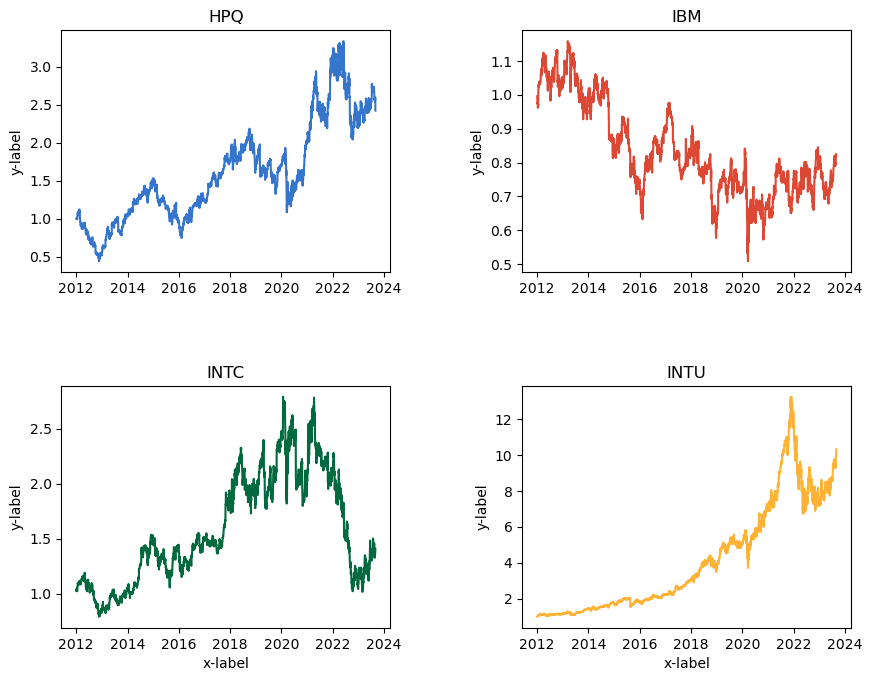

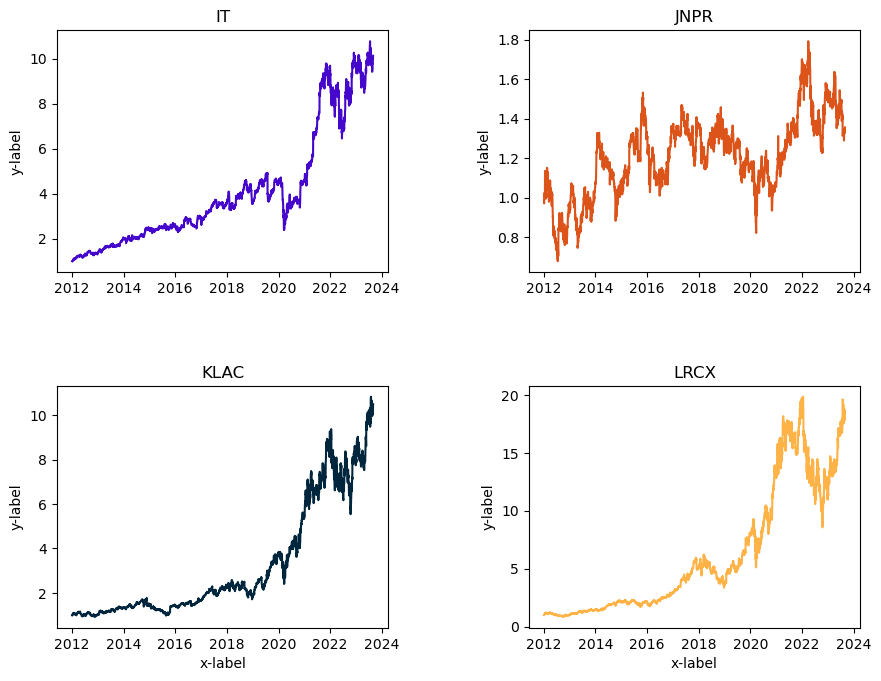

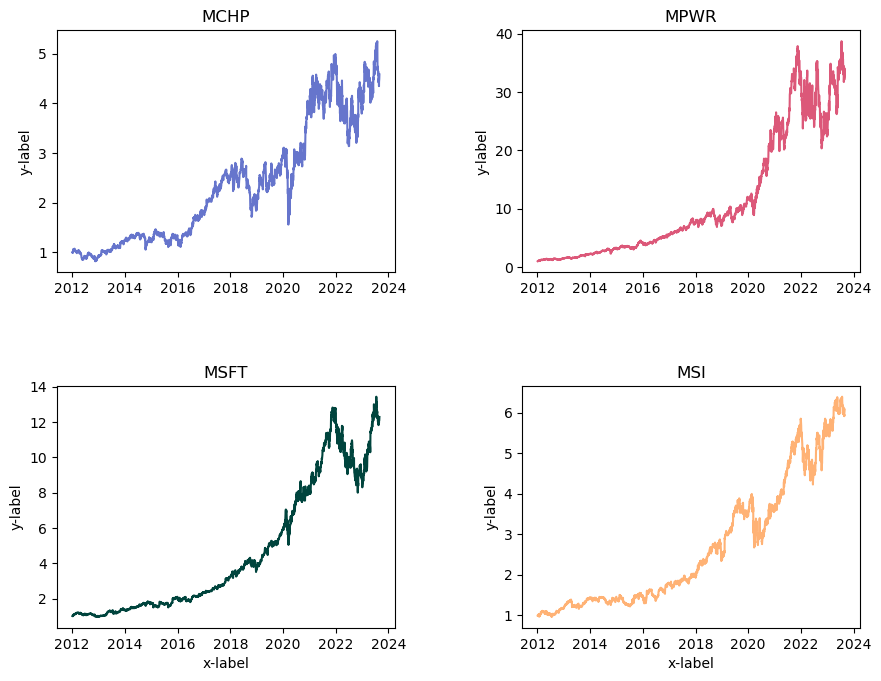

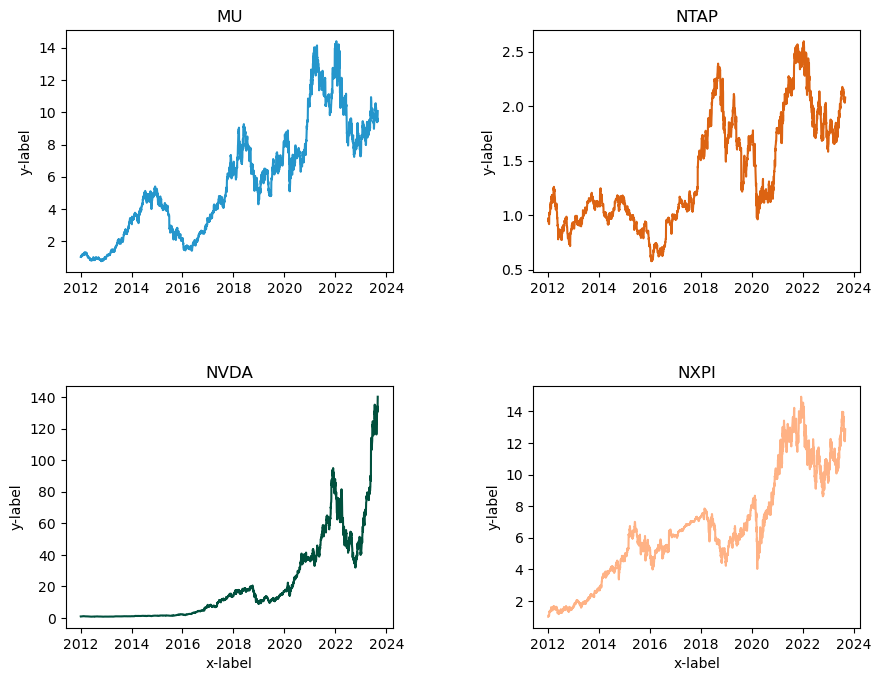

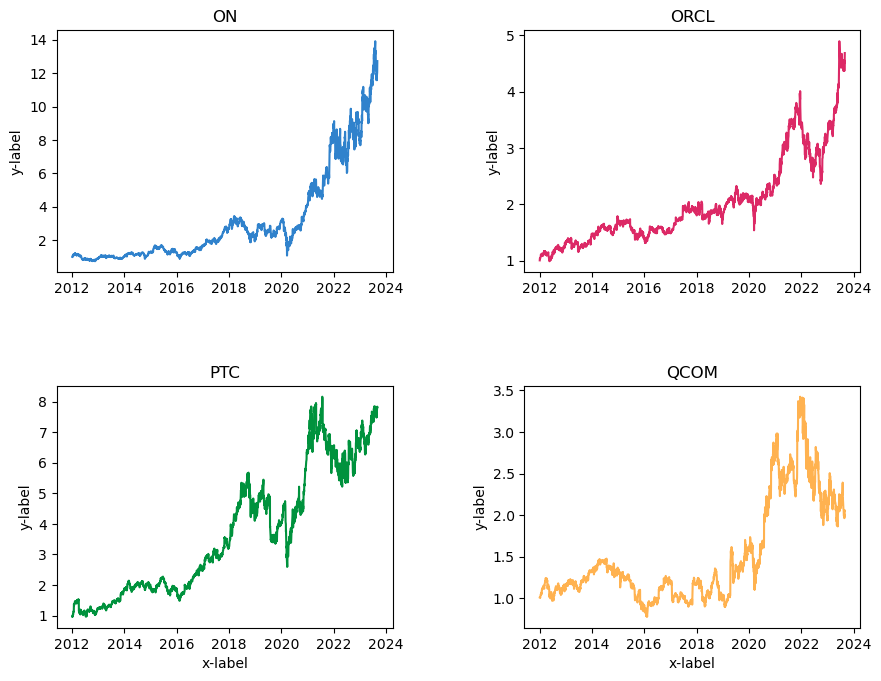

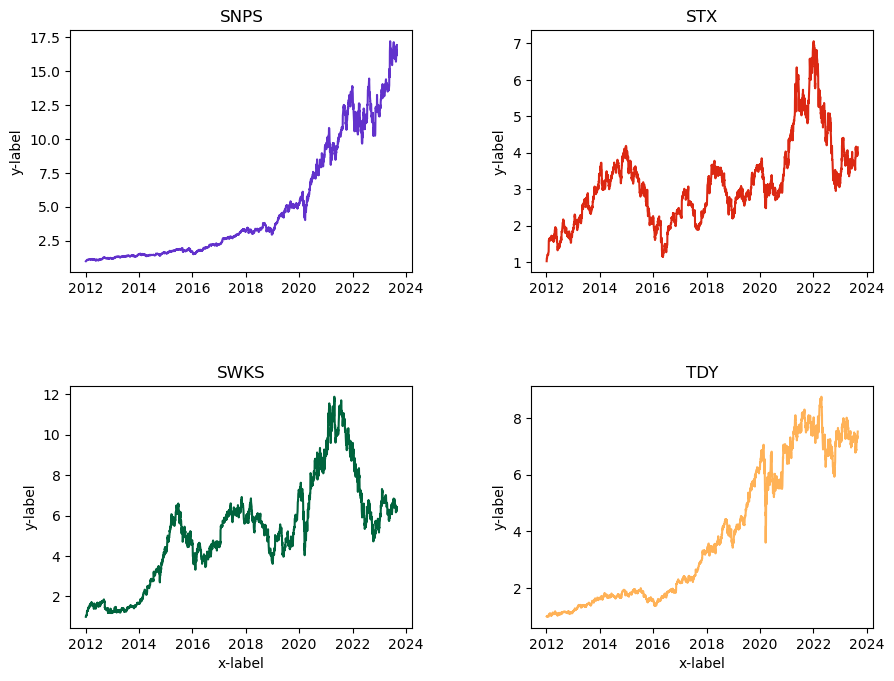

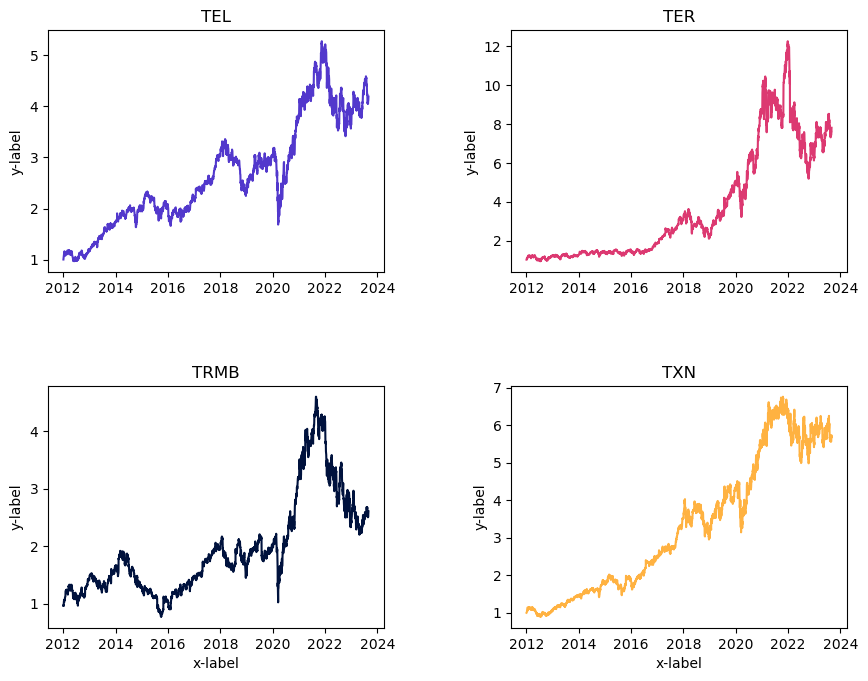

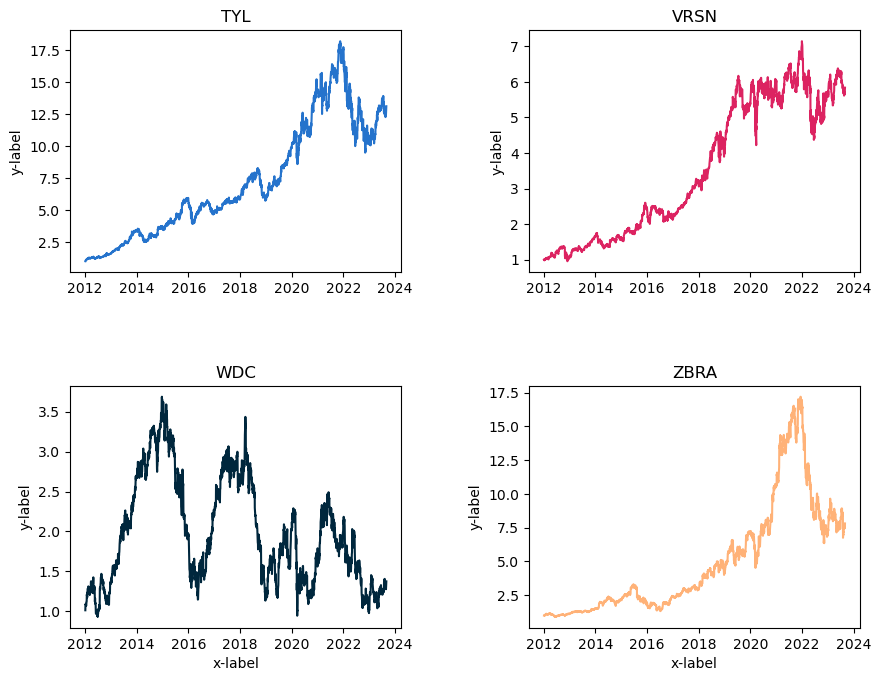

In [21]:
plotCharts(DailyCummulativeReturns, 'Daily Cummulative Returns Data')

<br>

### Monthly Cummulative Returns Data

In [22]:
# Computing the monthly cummulative returns

MonthlyCummulativeReturns = (monthly_returns.sort_values(['Date'], ascending=True) + 1).cumprod()

MonthlyCummulativeReturns.head()

AAPL       ACN      ADBE       ADI      ADSK      AKAM  \
Date                                                                     
2012-01-31       NaN       NaN       NaN       NaN       NaN       NaN   
2012-02-29  1.188311  1.038368  1.062682  1.002044  1.051389  1.116972   
2012-03-31  1.313420  1.124869  1.108562  1.032456  1.175556  1.138691   
2012-04-30  1.279311  1.132717  1.084006  0.996167  1.093611  1.011170   
2012-05-31  1.265620  0.995814  1.003231  0.929466  0.889444  0.910332   

                AMAT       AMD      ANSS      AVGO  ...      SWKS       TDY  \
Date                                                ...                       
2012-01-31       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2012-02-29  0.997557  1.095380  1.044470  1.108132  ...  1.249768  1.050035   
2012-03-31  1.013844  1.195231  1.074888  1.148203  ...  1.281279  1.110817   
2012-04-30  0.976384  1.096870  1.108778  1.015910  ...  1.257646  1.138478   
2012-05-31  0.841205  0.906110  1.022979  0.975250  ...  1.244671  1.049683   

                 TEL       TER      TRMB       TXN       TYL      VRSN  \
Date                                                                     
2012-01-31       NaN       NaN       NaN       NaN       NaN       NaN   
2012-02-29  1.071848  1.004281  1.073884  1.029957  1.075149  0.997570   
2012-03-31  1.077713  1.033027  1.162076  1.037986  1.093367  1.035367   
2012-04-30  1.069208  1.052599  1.156096  0.986411  1.137205  1.109881   
2012-05-31  0.921408  0.883792  1.007260  0.879555  1.061771  1.032127   

                 WDC      ZBRA  
Date                            
2012-01-31       NaN       NaN  
2012-02-29  1.079780  1.015856  
2012-03-31  1.138652  1.088266  
2012-04-30  1.067675  1.025106  
2012-05-31  0.863549  0.884514  

[5 rows x 52 columns]

<br>
<br>

### Monthly Cummulative Returns Chart

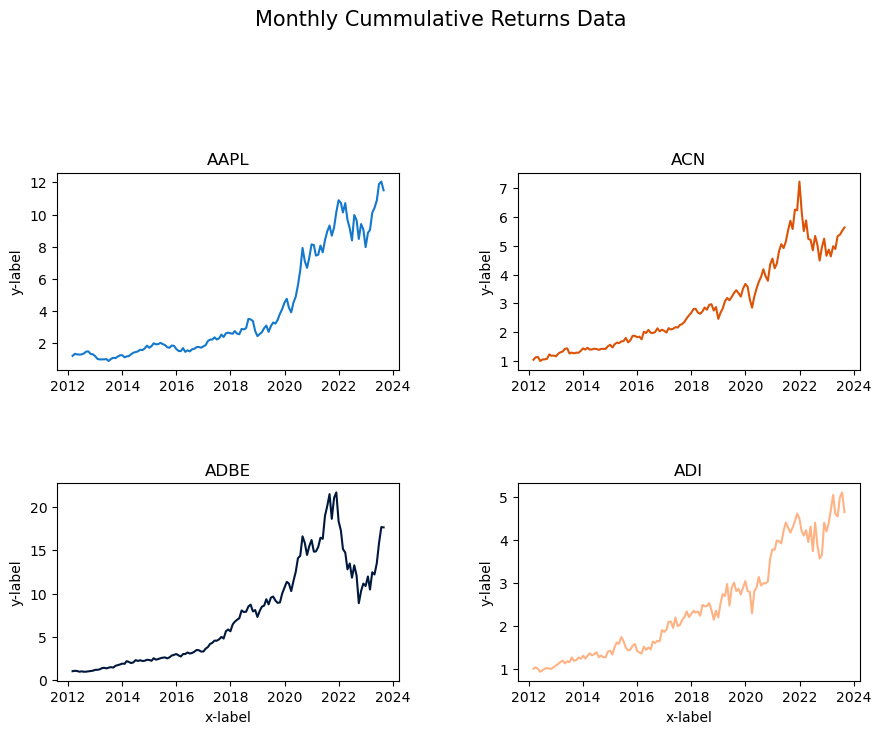

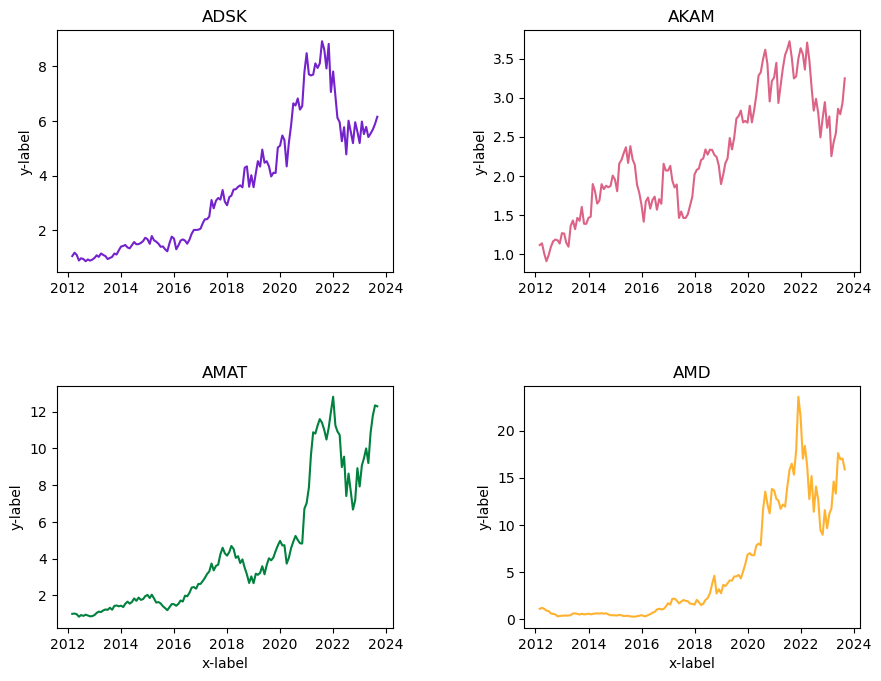

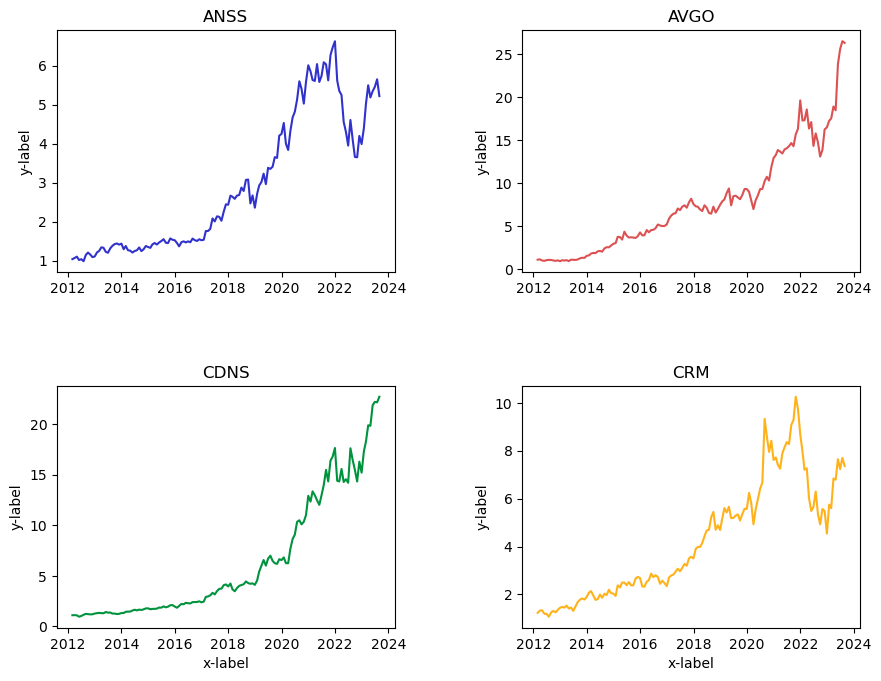

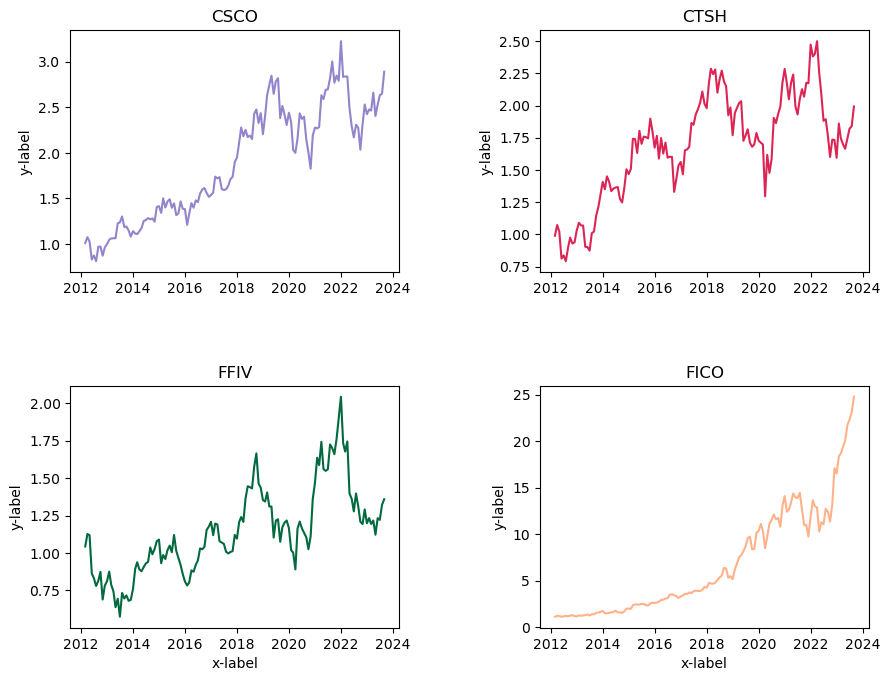

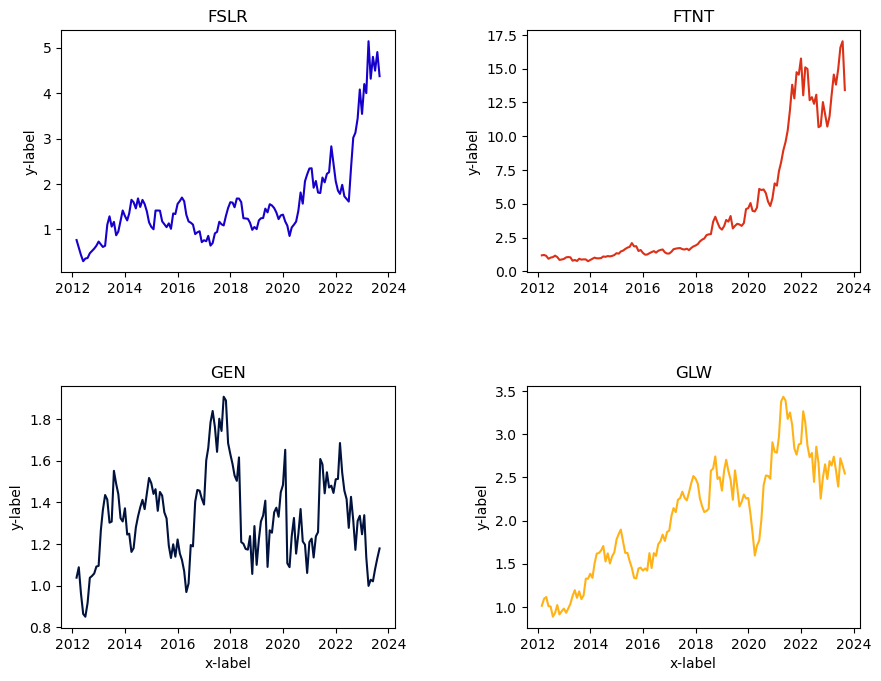

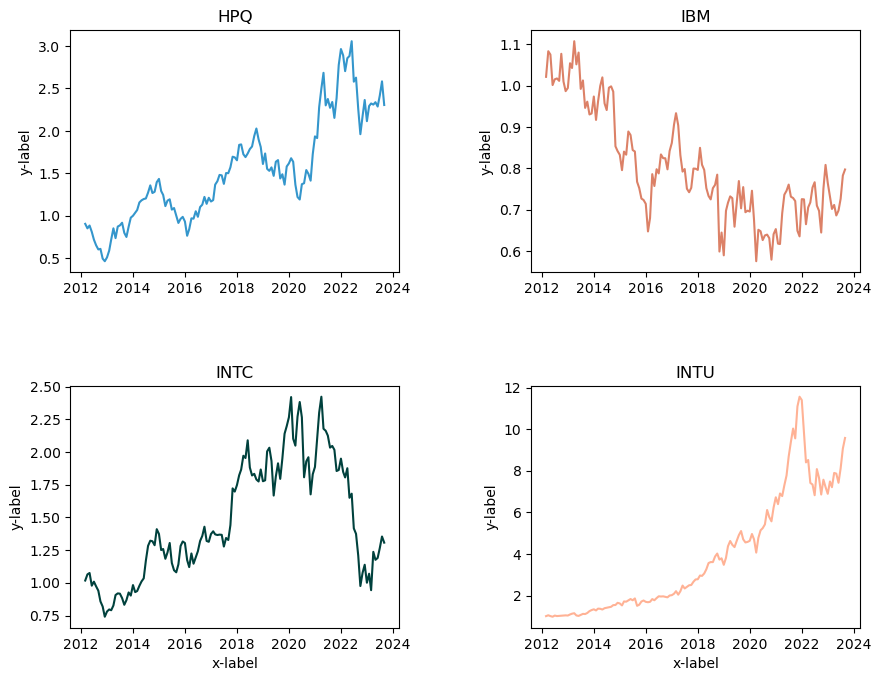

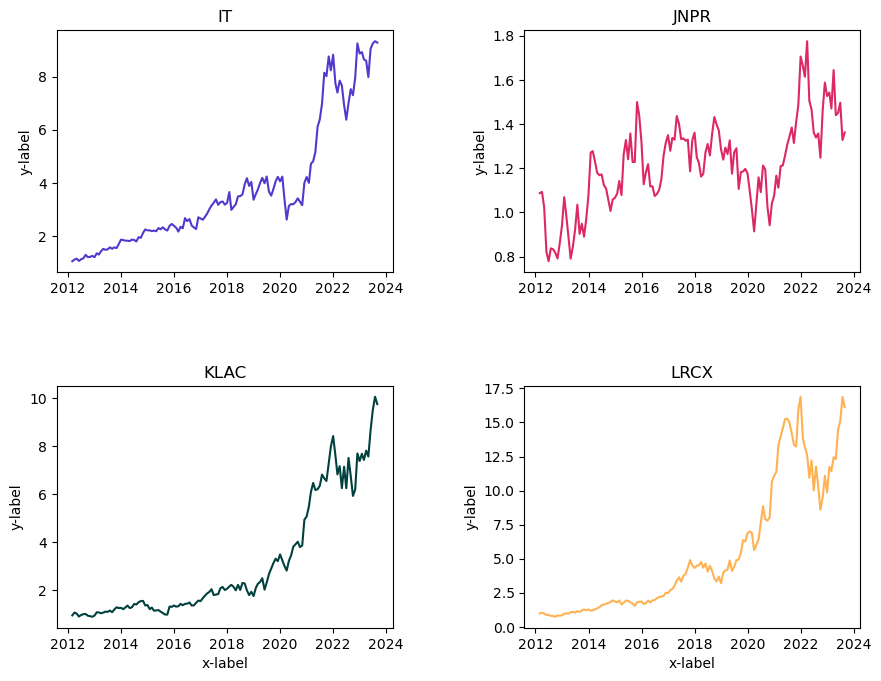

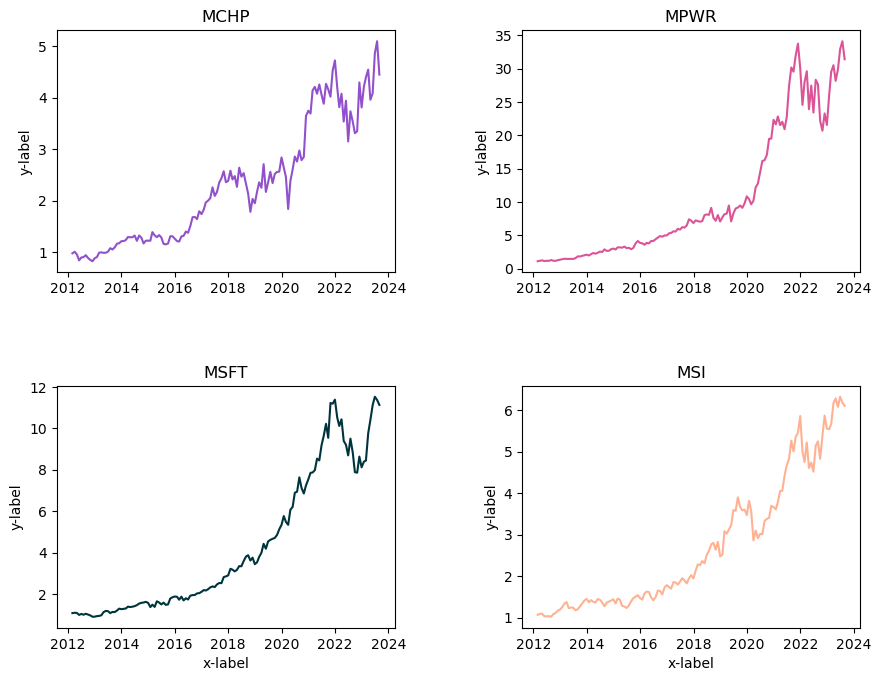

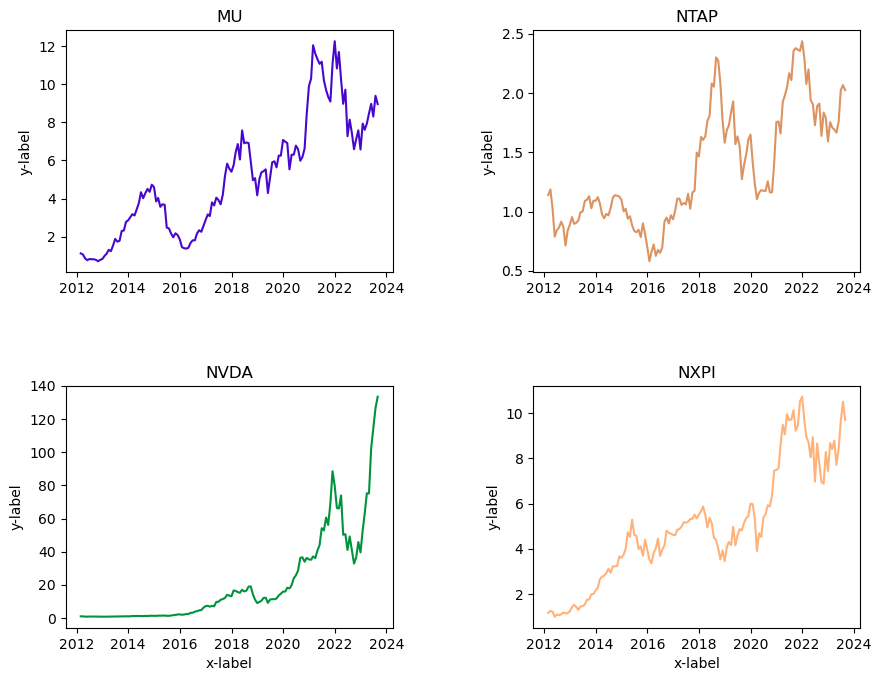

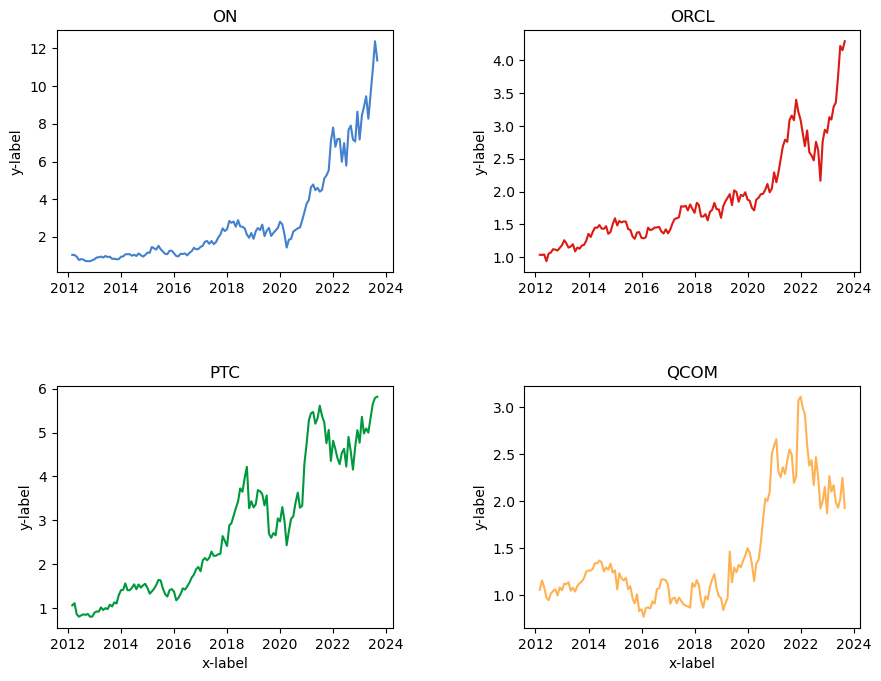

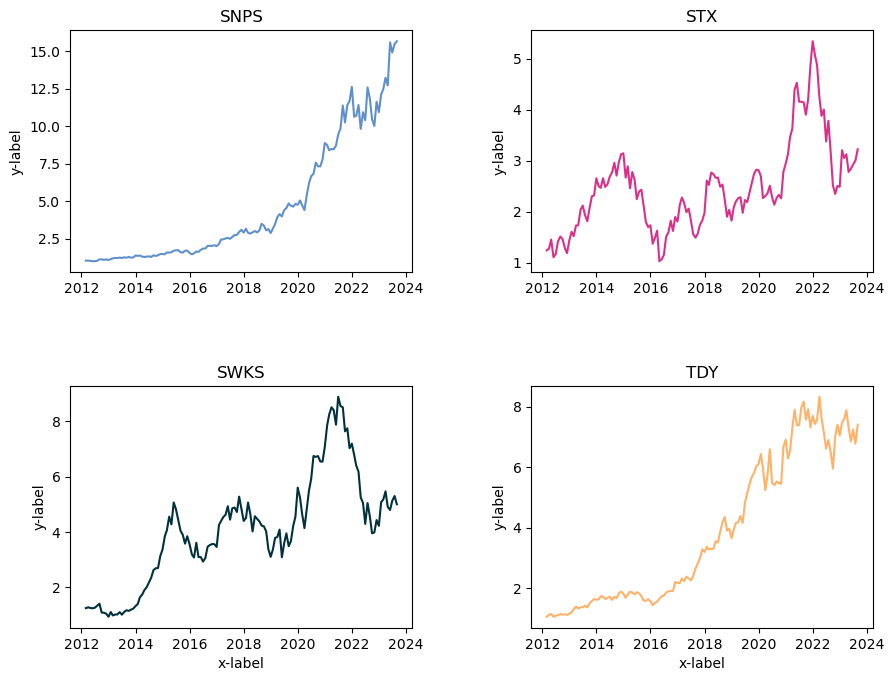

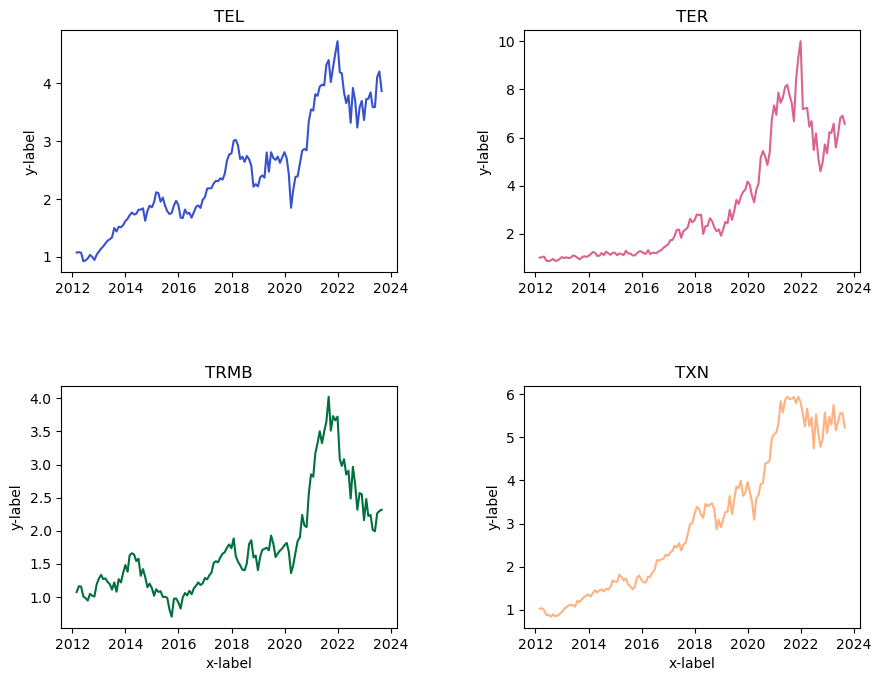

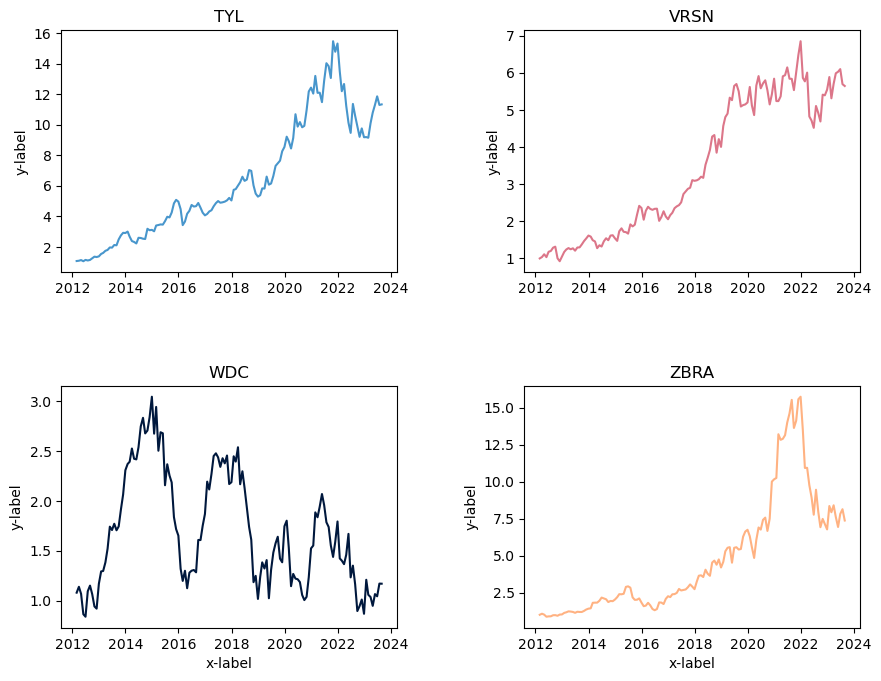

In [23]:
plotCharts(MonthlyCummulativeReturns, 'Monthly Cummulative Returns Data')

<br>

### Average

In [24]:
# Average daily returns. Should be multiplied by 21 if used for monthly calculation
# and by 252 when used for annual calculations
AverageDailyReturn = pd.DataFrame(daily_returns.mean(), columns=['AverageDailyReturn'])


#Should be multiplied by 12 when used for annual calculations
AverageMonthlyReturn = pd.DataFrame(monthly_returns.mean(), columns=['AverageMonthlyReturn'])


# Average annual return computed from the AverageMonthlyReturn
AverageAnnualReturn = AverageMonthlyReturn.mul(12)

### Variance

In [25]:
# Variance of daily returns. Should be multiplied by 21 if used for monthly calculations
# and by 252 when used for annual calculations
DailyVariance = pd.DataFrame(daily_returns.var(), columns=['DailyReturnVariance'])


#Should be multiplied by 12 when used for annual calculations
MonthlyVariance = pd.DataFrame(monthly_returns.var(), columns=['MonthlyReturnVariance'])


# Variance of annual return computed from the AnnualMonthlyAverage
AnnualVariance = MonthlyVariance.mul(12)

In [26]:
# A Dataframe to visualize the averages and variances
AverageAndVariance = pd.concat([AverageDailyReturn, AverageMonthlyReturn,
                                  DailyVariance, MonthlyVariance], axis=1)

AverageAndVariance['AverageAnnualReturn'] = AverageAnnualReturn


AverageAndVariance['AnnualVariance'] = AnnualVariance

AverageAndVariance.index.name = 'Tickers'

In [27]:
AverageAndVariance.head()

AverageDailyReturn  AverageMonthlyReturn  DailyReturnVariance  \
Tickers                                                                  
AAPL               0.001033              0.020930             0.000328   
ACN                0.000730              0.014415             0.000226   
ADBE               0.001197              0.023715             0.000382   
ADI                0.000719              0.013579             0.000335   
ADSK               0.000930              0.017751             0.000513   

         MonthlyReturnVariance  AverageAnnualReturn  AnnualVariance  
Tickers                                                              
AAPL                  0.006497             0.251157        0.077958  
ACN                   0.003803             0.172976        0.045634  
ADBE                  0.005720             0.284575        0.068642  
ADI                   0.005074             0.162945        0.060883  
ADSK                  0.009366             0.213013        0.112397

<br>

### Returns

The average annual return will be used to as the returns for subsequent calculations

In [28]:
Returns = AverageAnnualReturn

Returns.head()

AverageMonthlyReturn
AAPL              0.251157
ACN               0.172976
ADBE              0.284575
ADI               0.162945
ADSK              0.213013

### A chart displaying different Monthly returns.

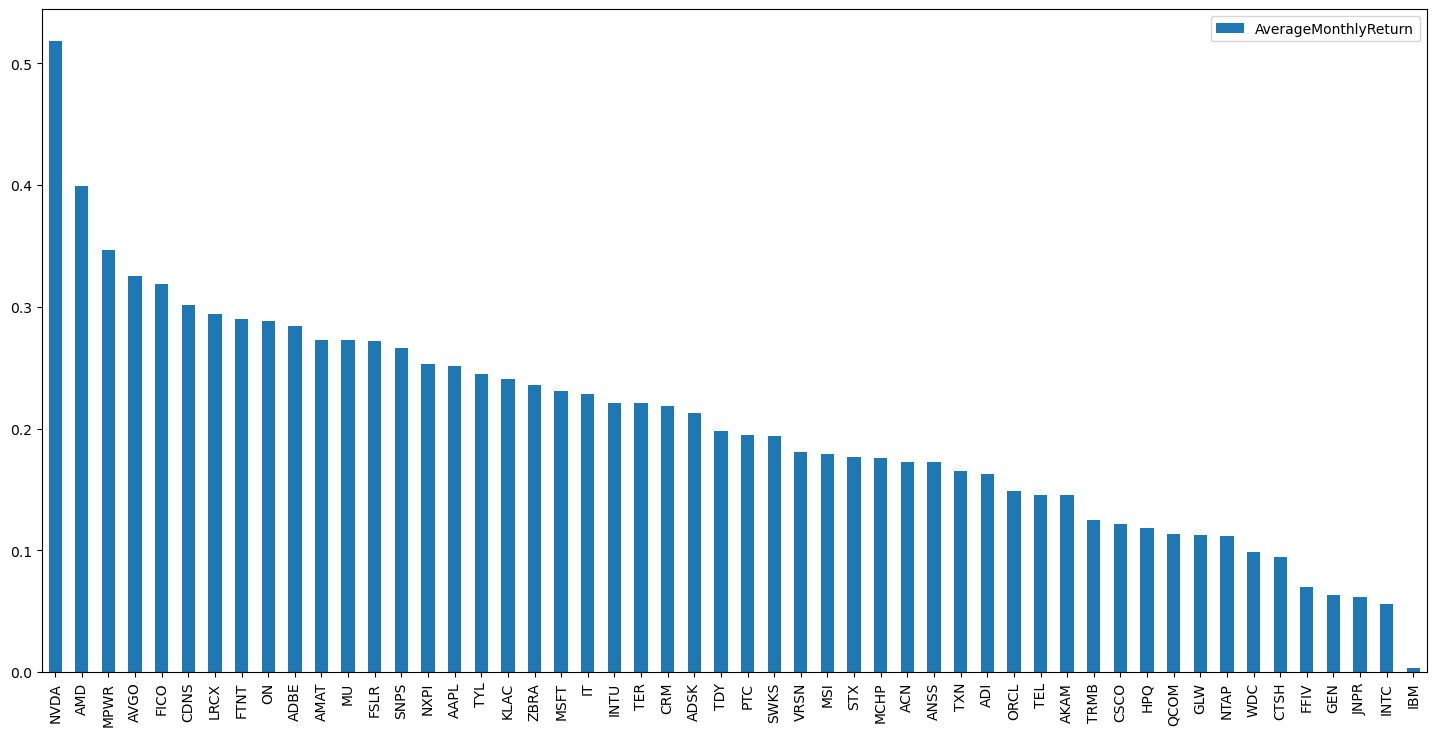

In [29]:
%matplotlib inline

print('\n\n')

plt.rcParams["figure.figsize"] = (15, 8)

Returns.sort_values(by='AverageMonthlyReturn', ascending=False).plot.bar()

plt.tight_layout(pad=3.0)

plt.show()

## Variance-Covariance Matrix

In [30]:
# Using the monthly returns, we compute the covariance matrix

covariance = monthly_returns.cov().mul(12)
covariance

AAPL       ACN      ADBE       ADI      ADSK      AKAM      AMAT  \
AAPL  0.077958  0.032413  0.038195  0.029397  0.042452  0.025114  0.031819   
ACN   0.032413  0.045634  0.032013  0.026713  0.043775  0.022340  0.038707   
ADBE  0.038195  0.032013  0.068642  0.032274  0.053223  0.029140  0.044273   
ADI   0.029397  0.026713  0.032274  0.060883  0.044818  0.010936  0.058011   
ADSK  0.042452  0.043775  0.053223  0.044818  0.112397  0.021766  0.060765   
AKAM  0.025114  0.022340  0.029140  0.010936  0.021766  0.088682  0.027237   
AMAT  0.031819  0.038707  0.044273  0.058011  0.060765  0.027237  0.112071   
AMD   0.056399  0.049962  0.064532  0.053830  0.069380  0.027781  0.090415   
ANSS  0.036636  0.034070  0.037573  0.033535  0.045987  0.015471  0.041522   
AVGO  0.032825  0.029284  0.033175  0.038968  0.043037  0.020446  0.054017   
CDNS  0.033960  0.031330  0.029641  0.033061  0.041785  0.021776  0.039049   
CRM   0.044308  0.030778  0.048967  0.025780  0.054474  0.030912  0.033780   
CSCO  0.026127  0.031287  0.024175  0.024680  0.036925  0.028171  0.042327   
CTSH  0.030330  0.030691  0.026286  0.029855  0.043432  0.018301  0.040732   
FFIV  0.030301  0.031603  0.023228  0.034612  0.041340  0.030493  0.042024   
FICO  0.031178  0.034454  0.032248  0.030638  0.050859  0.024134  0.044767   
FSLR  0.037000  0.038220  0.048223  0.040660  0.059225  0.039165  0.057735   
FTNT  0.044044  0.033300  0.037420  0.033753  0.051355  0.022893  0.038701   
GEN   0.020395  0.019812  0.021809  0.018317  0.034088  0.024447  0.031005   
GLW   0.033410  0.023984  0.029525  0.031010  0.031399  0.012862  0.048641   
HPQ   0.029424  0.027527  0.032399  0.032792  0.040844  0.002493  0.051650   
IBM   0.017096  0.023783  0.018663  0.023619  0.028249  0.020054  0.029207   
INTC  0.025470  0.021664  0.034437  0.028479  0.032261  0.021601  0.042493   
INTU  0.032627  0.030817  0.038799  0.028915  0.044706  0.015832  0.032149   
IT    0.023994  0.032241  0.024763  0.030958  0.038214  0.011896  0.041908   
JNPR  0.024694  0.024451  0.020437  0.022056  0.033104  0.029303  0.028893   
KLAC  0.029842  0.032806  0.037268  0.048266  0.047354  0.022675  0.076595   
LRCX  0.035783  0.032854  0.042531  0.048324  0.054532  0.025560  0.090417   
MCHP  0.033735  0.032618  0.040598  0.063086  0.053793  0.013816  0.078470   
MPWR  0.040967  0.028531  0.039845  0.045611  0.047576  0.011581  0.052556   
MSFT  0.030621  0.025483  0.032809  0.020665  0.033826  0.019165  0.029632   
MSI   0.015535  0.022407  0.022860  0.020332  0.032073  0.009103  0.022989   
MU    0.032919  0.027192  0.042370  0.050838  0.061035  0.026842  0.086105   
NTAP  0.041699  0.031802  0.031418  0.027748  0.051945  0.029088  0.045632   
NVDA  0.062482  0.040094  0.065183  0.053175  0.059419  0.030548  0.080671   
NXPI  0.039209  0.038437  0.042364  0.057747  0.054347  0.023418  0.071458   
ON    0.047037  0.044644  0.050016  0.074137  0.071762  0.020966  0.090977   
ORCL  0.026709  0.026760  0.031788  0.024790  0.034629  0.021768  0.034744   
PTC   0.029139  0.027827  0.038389  0.033620  0.066104  0.024528  0.045414   
QCOM  0.048530  0.029233  0.036817  0.037593  0.040181  0.027014  0.044396   
SNPS  0.034939  0.032769  0.033562  0.031454  0.040953  0.021720  0.040243   
STX   0.030336  0.027305  0.034783  0.039378  0.047446  0.033105  0.060171   
SWKS  0.054344  0.025112  0.036227  0.041410  0.042669  0.024073  0.053358   
TDY   0.021839  0.024507  0.024207  0.025008  0.035195  0.019463  0.037767   
TEL   0.033646  0.028197  0.035972  0.039418  0.047651  0.019633  0.055170   
TER   0.038308  0.036819  0.046826  0.054322  0.055215  0.031297  0.079321   
TRMB  0.045134  0.041107  0.049550  0.040384  0.072882  0.027940  0.065057   
TXN   0.027593  0.025448  0.030900  0.041683  0.038979  0.018936  0.050705   
TYL   0.019414  0.024971  0.029974  0.017071  0.037770  0.008259  0.026727   
VRSN  0.025341  0.026655  0.027193  0.020744  0.041812  0.022920  0.028002   
WDC   0.035208  0.036663  0.0421

## Equally-Weighted Portfolio

We start with equally-weighted portfolio and observe obtained results


The sum of the individual weights is expected to be equal to 1

In [31]:
# This function creates a equal weights based on the size of the portfolio.

def equal_weights(df):
    data = []
    weight = 1/len(list(df.columns))
    for col in df.columns:
        data.append([col, weight])
    
    weight_df = pd.DataFrame(data, columns=['Ticker', 'Weights'])
    
    
    return weight_df.set_index('Ticker')

In [32]:
weight_df = equal_weights(combined_df)
weight_df.head()

Weights
Ticker          
AAPL    0.019231
ACN     0.019231
ADBE    0.019231
ADI     0.019231
ADSK    0.019231

<br>

### Expected Returns

**This is the amount of profit or loss an investor can anticipate receiving on an investment.**

It is the product of Weights and returns

In [33]:
ExpectedReturn = weight_df.transpose().dot(Returns)

ExpectedReturn.values[0][0]

0.20337137246796205

#### Expected Return in percentage

In [34]:
ExpectedReturnPercentage = ExpectedReturn['AverageMonthlyReturn'].apply('{:.2%}'.format)[0]

print(ExpectedReturnPercentage)

20.34%


<br>

### Standard Deviation

**This is the statistical measure of market volatility, measuring how widely prices are dispersed from the average price.**

In [35]:
weight_df.shape

(52, 1)

In [36]:
StandardDeviation = weight_df.transpose().dot(covariance).dot(weight_df).apply(np.sqrt,axis=1)

StandardDeviation.values[0][0]

0.193843601195992

#### Standard Deviation expressed as a percentage

In [37]:
StandardDeviationPercentage = StandardDeviation['Weights'].apply('{:.2%}'.format)[0]

print(StandardDeviationPercentage)

19.38%


<br>

### Sharpe Ratio

**It is the measure of risk-adjusted return of a financial portfolio.**

**A portfolio with a higher Sharpe ratio is considered superior relative to its peers**

**The `Risk Free Rate` for the US for the month of August is estimated to be `3.8%`**

In [38]:
SharpeRatio = (ExpectedReturn.values[0][0] - RiskFreeRate)/StandardDeviation.values[0][0]

SharpeRatio

0.8531175207623068

<br>
<br>

## Maximizing the Sharpe Ratio to obtain Optimal Portfolio Weight

To obtain an optimally-risky portfolio, it is essential to maximize the `Sharpe Ratio`

The `minimize` library function from the `Scipy.optimize` package of Python was used.

#### Objective:
 - The objective is to find out the optimal weights that will ensure maximal Sharpe Ratio for the portfolio.
 - This is required to explore the optimal portfolio set.

Since Scipy Optimization Library only minimize, and the objective is to maximize, the **principle of duality** from Optimization Theory can be used to undertake the transformation to obtain maximization.

Reference: https://www.kaggle.com/code/vijipai/lesson-6-sharpe-ratio-based-portfolio-optimization

#### The Function below was written to maximize Sharpe Ratio

In [39]:
# Function to undertake Sharpe Ratio maximization subject to basic constraints of the portfolio

def MaximizeSharpeRatio(AverageReturns, VarianceCovariancce, RiskFreeRate, PortfolioSize):
    '''
            A function to perform the optimization of a given function
    Inputs:
            AverageReturns: A one-dimensional array of sihape n x 1; in this case annual average of portfolio
            VarianceCovariance: A two-dimensional array of shape n x n; covariance matrix of portfolio
            RiskFreeRate: A scalar value (float)
            PortfolioSize: An intger; The of the portfolio
            
    Outputs:
            OptimizedSharpeRatio: A float representing the optimized function; in this instance, Sharpe Ratio
            
    '''
    
    # define maximization of Sharpe Ratio using principle of duality
    
    def  ObjectiveFunction(Weights, AverageReturns, VarianceCovariancce, RiskFreeRate, PortfolioSize):
        '''
                This is the function to be maximixed passed into the minimize funtion of the Scipy.optimize
        Inputs:
                Weights: A one-dimensional array of shape n x 1 that is to be adjusted for optimization
                
                Other inputs are consistent with the above description
        
        Output:
                func: The function to be optimized (Maximised).
        '''
        
        ExpectedReturn = Weights.transpose().dot(AverageReturns)
        StandardDeviation = np.sqrt(Weights.transpose().dot(VarianceCovariancce).dot(Weights))
        funcDenom = StandardDeviation
        funcNumer = ExpectedReturn - RiskFreeRate
        
        func = -(funcNumer / funcDenom)
        return func

    
    # define equality constraint representing fully invested portfolio
    def constraintEq(Weights):
        
        A = np.ones(Weights.shape)
        b = 1
        constraintVal = np.matmul(A, Weights.T)-b 
        return constraintVal
    
      
    
    #define bounds and other parameters
    InitialWeights = np.repeat(1/PortfolioSize, PortfolioSize)
    cons = ({'type': 'ineq', 'fun':constraintEq})
    lb = 0
    ub = 1
    bnds = tuple([(lb, ub) for x in InitialWeights])
    
    #invoke minimize solver
    OptimizedSharpeRatio = optimize.minimize(ObjectiveFunction, x0 = InitialWeights, args = (AverageReturns, VarianceCovariancce, 
                                                    RiskFreeRate, PortfolioSize), method = 'SLSQP', 
                                                     bounds = bnds, constraints = cons, tol = 10**-3)
    
    return OptimizedSharpeRatio

In [40]:
PortfolioSize = len(Returns)

<br>
<br>

#### Maximized Sharpe Ratio and optimal weights computation

In [41]:
# Compute maximal Sharpe Ratio and optimal weights

def RiskAndSharpeRatio(MaximizedSharpeRatioResult, covariance, RiskFreeRate):
    '''
        This function computes the risk returns and max Sharpe Ratio of the optimal portfolio
        
        Input:
                MaximizedSharpeRatioResult: The returned result from the optimization function
                covariance: The covariance matrix
                RiskFreeRate: The Risk free rate.
                
        Output:
                The output is a tuple which consists the following;
                
                OptimalWeights: A 1-Dimensional array representing the Optimal weights of the portfolios
                AnnualReturn: The Risk associated with the Portfolio
                AnnualRisk: The annual risk associated with the portfolio
                MaximalSharpeRatio: The optimized value of the Sharpe Ratio
                
    '''   
    
    
    # Optimal weights of each portfolio after optimization
    OptimalWeights = round(pd.DataFrame(MaximizedSharpeRatioResult.x, index=Tickers, columns=['Weights']).mul(1/sum(MaximizedSharpeRatioResult.x)), 4)

    # The risk of each portfolio which is the standard deviation
    Risk = OptimalWeights.transpose().dot(covariance).dot(OptimalWeights)

    # The expected monthly return
    ExpectedReturn = OptimalWeights.transpose().dot(Returns)

    
    # Annual risk associated with the Portfolio
    AnnualRisk =   (Risk).mul(12).apply(np.sqrt,axis=1)
    
    # Annual Return
    AnnualReturn = ExpectedReturn*12

    # Maximum Sharpe Ratio after Optimization
    
    MaximalSharpeRatio = round((ExpectedReturn.values[0][0] - RiskFreeRate)/Risk.apply(np.sqrt,axis=1).values[0][0], 4)
    
    return (OptimalWeights, AnnualReturn.values[0][0], AnnualRisk.values[0][0], MaximalSharpeRatio)

<br>
<br>

### Viewing Important results

In [42]:
# Size of portfolio
PortfolioSize = len(Returns)

# calling the optimization function with appropriate inputs
result = MaximizeSharpeRatio(Returns, covariance, RiskFreeRate, PortfolioSize)

# Reading the result of important data into variables

OptimalWeights, AnnualReturn, AnnualRisk, MaximalSharpeRatio = RiskAndSharpeRatio(result, covariance, RiskFreeRate)

<br>

### The Optimal Weights of Portfolio

In [43]:
OptimalWeights['PercentageWeight'] = OptimalWeights['Weights'].map('{:.2%}'.format)

OptimalWeights

Weights PercentageWeight
AAPL   0.0000            0.00%
ACN    0.0000            0.00%
ADBE   0.0183            1.83%
ADI    0.0000            0.00%
ADSK   0.0000            0.00%
AKAM   0.0000            0.00%
AMAT   0.0000            0.00%
AMD    0.0000            0.00%
ANSS   0.0000            0.00%
AVGO   0.1457           14.57%
CDNS   0.1154           11.54%
CRM    0.0000            0.00%
CSCO   0.0000            0.00%
CTSH   0.0000            0.00%
FFIV   0.0000            0.00%
FICO   0.1607           16.07%
FSLR   0.0000            0.00%
FTNT   0.0000            0.00%
GEN    0.0000            0.00%
GLW    0.0000            0.00%
HPQ    0.0000            0.00%
IBM    0.0000            0.00%
INTC   0.0000            0.00%
INTU   0.0000            0.00%
IT     0.0097            0.97%
JNPR   0.0000            0.00%
KLAC   0.0000            0.00%
LRCX   0.0000            0.00%
MCHP   0.0000            0.00%
MPWR   0.1209           12.09%
MSFT   0.0771            7.71%
MSI    0.0708            7.08%
MU     0.0000            0.00%
NTAP   0.0000            0.00%
NVDA   0.1369           13.69%
NXPI   0.0000            0.00%
ON     0.0000            0.00%
ORCL   0.0000            0.00%
PTC    0.0000            0.00%
QCOM   0.0000            0.00%
SNPS   0.0000            0.00%
STX    0.0000            0.00%
SWKS   0.0000            0.00%
TDY    0.0308            3.08%
TEL    0.0000            0.00%
TER    0.0000            0.00%
TRMB   0.0000            0.00%
TXN    0.0000            0.00%
TYL    0.1138           11.38%
VRSN   0.0000            0.00%
WDC    0.0000            0.00%
ZBRA   0.0000            0.00%

<br>

### Annual Return

In [44]:
# Expressing the annual risk on a Dataframe both as a raw figure and percentage

AnnualReturn_df = pd.DataFrame([[AnnualReturn]], columns=['AnnualReturn(%)'])

AnnualReturn_df

AnnualReturn(%)
0           3.8184

<br>

### Annual Risk

In [45]:
# Expressing the annual risk on a Dataframe both as a raw figure and percentage

AnnualRisk_df = pd.DataFrame([[AnnualRisk]], columns=['AnnualRisk(%)'])

AnnualRisk_df

AnnualRisk(%)
0       0.682239

<br>

### Maximized Sharpe Ratio

In [46]:
 MaximalSharpeRatio

1.4227

<br>
<br>

The output shows that the maximal Sharpe Ratio attainable for the 52 portfolio is 1.42 which is good, going by practical standards. The annual expected portfolio return is 3.82% against an annualized risk of 0.68%.

To achieve this, the optimal capital allocations on the assets of  portfolio are as follows:


In [47]:
# Obtaining only those assets with non-zero values
InvestmentAllocation = OptimalWeights[['PercentageWeight']][OptimalWeights['Weights'] != 0]

# Adding the tickers title as the index title
InvestmentAllocation.index.name = 'Tickers'

# Renaming the column for comprehension
InvestmentAllocation.columns = ['PercentageAllocation']

InvestmentAllocation

PercentageAllocation
Tickers                     
ADBE                   1.83%
AVGO                  14.57%
CDNS                  11.54%
FICO                  16.07%
IT                     0.97%
MPWR                  12.09%
MSFT                   7.71%
MSI                    7.08%
NVDA                  13.69%
TDY                    3.08%
TYL                   11.38%

<br>

**No investments need be made in the rest of the assets of  k -portfolio 1 since the optimal weights arrived at for these assets are 0.**

<br>
<br>


## References

1. Lesson 6:Sharpe Ratio based Portfolio Optimization    by DR G A VIJAYALAKSHMI PAI

    https://www.kaggle.com/code/vijipai/lesson-6-sharpe-ratio-based-portfolio-optimization
<br>

2. https://www.youtube.com/watch?v=PgjkG6Xjz6Y
<br>

3. https://www.youtube.com/watch?v=tMNPYRhMqos
<br>

4. https://www.youtube.com/watch?v=CNIVd_b7YJc